## THIS IS A COPY OF EXPLORATORY.IPYNB, DUE TO NEW STRATEGY TO COMPUTE JOINT ANGLES STARTED ON 19TH JULY

In [549]:
import pandas as pd
from utils import *
from joint_angles.calculate_joint_angles import *
# Import everything needed to edit video clips 
from moviepy.editor import *
# for 3d plots
import plotly.express as px
#for heatmaps
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_path = "../data/small_data/pose_saved.csv"
data = pd.read_csv(data_path)
print(data.dtypes)
data.head()

rgb_frameid     int64
kp3ds          object
kp2ds          object
bboxes         object
dtype: object


,rgb_frameid,kp3ds,kp2ds,bboxes
0,5000,"[[2433.527603034382, -1938.5729978558697, 65.7...","[[[1008.9975321765137, 101.44294880551615, 0.7...","[[743.9833984375, 0.0, 1234.8826904296875, 622..."
1,5001,"[[2446.607236443355, -1934.9092386957425, 67.5...","[[[999.6039120528574, 99.06533975351539, 0.758...","[[740.1781616210938, 0.0, 1231.525390625, 622...."
2,5002,"[[2460.826163175043, -1930.3790846162383, 69.3...","[[[992.6256386363831, 97.69814209614634, 0.727...","[[736.6728515625, 0.089996337890625, 1228.7199..."
3,5003,"[[2473.6984260388895, -1926.4497944254015, 73....","[[[985.1741546289431, 95.75803250340277, 0.752...","[[734.6681518554688, 0.10302734375, 1223.74499..."
4,5004,"[[2489.1893336653734, -1925.6113847420506, 73....","[[[978.2528523690814, 95.23409782663788, 0.765...","[[733.6686401367188, 0.173248291015625, 1216.8..."


### Let's only take the first two columns


In [3]:
df = data[['rgb_frameid', 'kp3ds']]
print(type(df.kp3ds[0]))
df.kp3ds[0]

<class 'str'>


'[[2433.527603034382, -1938.5729978558697, 65.77853319876616, 0.715919840335846], [2455.1936794872177, -1931.8907779942238, 97.20523561103043, 0.6419889330863953], [2413.1285141606477, -1915.3594788777505, 100.405452670196, 0.6129101574420929], [2553.3050698424627, -1851.7950717623419, 114.90635783137866, 0.7434812635183334], [2406.47320246087, -1791.7937153377102, 130.30197906455479, 0.58548554033041], [2645.352619537392, -1677.0320842443841, -34.92217267652428, 0.721489417552948], [2305.953153691892, -1832.9165705828136, -22.7491032373318, 0.675788402557373], [2713.5425084514063, -1596.1945567660148, -283.31397363860276, 0.6877377976973852], [2205.742184616739, -2043.9587716844408, -78.7145570247363, 0.6339661717414856], [2746.769581107897, -1777.5664535076626, -405.71990057299956, 0.6417463049292564], [2196.6960493973734, -2288.6940364719085, -26.30439482351236, 0.7618403911590577], [2601.681535535075, -1730.8660615202673, -554.1895844242209, 0.642460686819894], [2415.360061812779, 

### Let's convert the string into vector

In [4]:
df['kp3ds'] = df['kp3ds'].apply(str2float)
df['kp3ds']

0       [[2433.527603034382, -1938.5729978558697, 65.7...
1       [[2446.607236443355, -1934.9092386957425, 67.5...
2       [[2460.826163175043, -1930.3790846162383, 69.3...
3       [[2473.6984260388895, -1926.4497944254015, 73....
4       [[2489.1893336653734, -1925.6113847420506, 73....
                              ...                        
4995    [[2783.777098030839, -480.39212498854664, -45....
4996    [[2786.0874771535578, -479.94158441571295, -46...
4997    [[2791.0247204375196, -479.5124704274368, -46....
4998    [[2793.123929938673, -480.28451711442835, -46....
4999    [[2799.4689841766367, -479.83214699544794, -46...
Name: kp3ds, Length: 5000, dtype: object

### Let's separate each kp3ds line into columns for each body points, and remove kp3ds column

In [5]:
df_points = get_df_points(df)
df = pd.concat([df, df_points], axis=1)
df.drop(columns=['kp3ds'], inplace=True)
df.head(3)

,rgb_frameid,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16
0,5000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,5001,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."
2,5002,"[2460.826163175043, -1930.3790846162383, 69.34...","[2484.918090524629, -1924.8040044837676, 99.79...","[2440.8411861266345, -1900.254950299179, 104.3...","[2584.0739331874606, -1851.960169894501, 113.9...","[2435.4652524619855, -1776.6510228370694, 132....","[2684.776549436161, -1687.3026095059545, -43.6...","[2329.3454519494003, -1808.3264969982044, -19....","[2743.056079751839, -1614.688905862936, -304.6...","[2195.1750290174386, -2006.137971398989, -65.8...","[2755.032244545425, -1812.6779647475068, -409....","[2206.279819898573, -2244.3941945026313, -3.28...","[2619.789612932464, -1751.2821608695785, -572....","[2427.258121931534, -1746.360628016013, -587.8...","[2695.004890749521, -1794.4201805342605, -942....","[2404.6687226515774, -1789.2744484614768, -100...","[2769.543079408299, -1809.2850525834021, -1367...","[2415.272491615325, -1700.7187023871097, -1364..."


#### The framerate is 30 FPS, let's convert the frameid column into time

In [6]:
df['rgb_frameid'] = (df['rgb_frameid'] - 5000)/30
df.rename(columns={'rgb_frameid': 'time'}, inplace=True)
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."


### Placement of 3D body points
<a href=https://github.com/open-mmlab/mmpose/tree/main/projects/rtmpose><img src="https://user-images.githubusercontent.com/13503330/245036409-2417e4f7-2203-468f-bad0-e7a6a6bf8251.jpg"  width="150" height="300" style="float: left">

<img src = 'img/3d_body_points_axes.jpeg' style = 'float:middle' width = 300>

#### Which one is left/right ?
At the beginning of the video, the participants right foot has the lowest x value. By taking a look at points 15 and 16 x values, the **point 16** corresponds to the **right** foot.

From this information, we can better precise the column names in our dataset.

In [7]:
df.rename(columns = {'point_5':'leftshoulder', 'point_6':'rightshoulder', 
                     'point_8':'rightelbow', 'point_7':'leftelbow', 
                     'point_10':'rightwrist', 'point_9':'leftwrist',
                     'point_12':'righthip', 'point_11':'lefthip'}, inplace = True)
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,leftwrist,rightwrist,lefthip,righthip,point_13,point_14,point_15,point_16
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."


#### Add hips and neck as new joint positions for later analyses

In [8]:
# Add middle of the hip as another "joint position"
difference = df['lefthip'] - df['righthip']
difference = difference/2
hips = df['righthip'] + difference
df['hips'] = hips

# Add middle of the shoulders as another "joint position"
difference = df['leftshoulder'] - df['rightshoulder']
difference = difference/2
neck = df['rightshoulder'] + difference
df['neck'] = neck

In [9]:
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,leftwrist,rightwrist,lefthip,righthip,point_13,point_14,point_15,point_16,hips,neck
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136...","[2508.520798673927, -1735.7654378397474, -566....","[2475.652886614642, -1754.974327413599, -28.83..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366...","[2514.881311246032, -1748.2993910082603, -560....","[2491.9828756353963, -1750.1885569870726, -28...."


## Events selection in video

Let's assume that the picking event begins when subject looks at the object of interest. Let's also differentiate when the person picks something up with the left or right hand.

In [10]:
events = {'picking_r' : [[6, 7], [132.5, 134.5]],
          'picking_fridge' : [[51, 68]],
          'cutting' : [[149, 169]],
          'stirring' : [[]],
          'washing' : [[17, 33]]}

## Features

### 1. Get angles 

At first, I just tried to get the angles between 2 vectors (for example shoulder-elbow and wrist-elbow) to define it as the "angle joint". But then I realized that one can not just do that, since it will be then not sufficient to define the flexion, ab/adduction etc. 

I went back to read some literature on how to define joint angles based on 3D body points, and found some interesting references :
- [Method to estimate joint angles + code](https://temugeb.github.io/python/motion_capture/2021/09/16/joint_rotations.html)
It explains how to find joint angles based on basic body pose (T-pose)
- [This paper](https://www.nature.com/articles/s41591-022-02045-1#Sec9) explains that joint angles can be extracted in 3 d.o.f for each joint, by following the International Society of Biomechanics recommendations for Euler angle extractions of X (abduction/adduction), Y (internal/external rotation) and Z (flexion/extension).
- [This paper](https://www.rachelvitali.com/docs/Determining%20anatomical%20frames%20via%20inertial%20motion%20capture%20-%20a%20survey%20of%20methods.pdf) says that there are different methods used to define anatomical frames of reference for inertial motion capture.

--> So I should come up myself with a method to define the anatomical frame of reference.

**Here is my method to try to express the joint angles in every anatomical plane :**

1. Define the anatomical plan of the movement with the help of the existing body points
2. Project the moving segment onto that plan
3. Compute the angle between a segment of that plane and the moving segment
4. Readjust the angle according to litterature to distinguis antagonists movement (flexion/extension)

<a href = "https://en.wikipedia.org/wiki/Anatomical_plane"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Human_anatomy_planes%2C_labeled.svg/1200px-Human_anatomy_planes%2C_labeled.svg.png" width = 200 /></a>

### First get "naive" joint angles, without separation to 3 planes

In [11]:
add_naive_joint_angles(df, 'lefthip', 'leftshoulder', 'leftelbow')
add_naive_joint_angles(df, 'righthip', 'rightshoulder', 'rightelbow')
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,...,lefthip,righthip,point_13,point_14,point_15,point_16,hips,neck,leftshoulder_angle,rightshoulder_angle
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...",...,"[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136...","[2508.520798673927, -1735.7654378397474, -566....","[2475.652886614642, -1754.974327413599, -28.83...",30.665434,89.696655
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....",...,"[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366...","[2514.881311246032, -1748.2993910082603, -560....","[2491.9828756353963, -1750.1885569870726, -28....",30.595906,88.546214


#### 1.1 Shoulder forward flexion/extension

<a href="https://physicaltherapyweb.com/hyper-extension-internal-rotation-heri-test/"><img src ="https://i0.wp.com/physicaltherapyweb.com/wp-content/uploads/2016/08/shoulder-flexion-and-extension.png?fit=329%2C410&ssl=1" width = 200 style="float: left;"/></a>
<img src = "img/shoulder_flex.jpg" width = 150>

The movement is on the sagittal plane. RoM is around 160 degrees of flexion from this [paper](https://bmcmusculoskeletdisord.biomedcentral.com/articles/10.1186/s12891-020-03665-9).



The sagittal plane for the shoulder is defined by the plane spanned by the vector <span style="color:red">b</span> and the <span style="color:green">normal vector</span> (= <span style="color:red">a x b</span>.)

Then, <span style="color:red">d</span> is projected onto that plane.

Finally, the shoulder forward flexion is the angle betwen the projected <span style="color:red">d</span> and <span style="color:red">b</span>.

To differentiate between flexion and extension, one can see if projected <span style="color:red">d</span> is closest to the <span style="color:green">normal vector</span> <span style="color:red">a x b</span> (flexion) or <span style="color:red">b x a</span> (extension)




In [12]:
# For the left shoulder
A = df['rightshoulder'] - df['leftshoulder']
B = df['lefthip'] - df['leftshoulder']
D = df['leftelbow'] - df['leftshoulder']

B_u = [unit_vector(b) for b in B]
D_u = [unit_vector(d) for d in D]
N = [np.cross(a, b) for a, b in zip(A, B)]

# d projection
N2 = [np.cross(n, b) for n, b in zip(N, B)]
# finding norm of the vector N2 
N2_norm = [np.linalg.norm(n) for n in N2]
D_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D_u, N2, N2_norm)]

angle = [np.dot(d, b) for d, b in zip(D_proj, B_u)]
angle = np.arccos(angle)*180/np.pi

# To define if it is flexion or extension
N_behind = [np.cross(b, a) for a, b in zip(A, B)]
for i in range(len(N)):
    norm_front = np.linalg.norm(D_proj[i] - N[i])
    norm_behind = np.linalg.norm(D_proj[i] - (N_behind[i]))

    if norm_behind < norm_front:
        angle[i] = -angle[i]

df['leftshoulder_flex'] = angle

In [13]:
# For the right shoulder
A = df['rightshoulder'] - df['leftshoulder']
B = df['rightshoulder'] - df['righthip']
D = df['rightshoulder'] - df['rightelbow']

B_u = [unit_vector(b) for b in B]
D_u = [unit_vector(d) for d in D]
N = [np.cross(b, a) for a, b in zip(A, B)]

# d projection
N2 = [np.cross(n, b) for n, b in zip(N, B)]
# finding norm of the vector N2 
N2_norm = [np.linalg.norm(n) for n in N2]
D_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D_u, N2, N2_norm)]

angle = [np.dot(d, b) for d, b in zip(D_proj, B_u)]
angle = -np.arccos(angle)*180/np.pi

# To define if it is flexion or extension
N_behind = [np.cross(a, b) for a, b in zip(A, B)]
for i in range(len(N)):
    norm_front = np.linalg.norm(D_proj[i] - N[i])
    norm_behind = np.linalg.norm(D_proj[i] - N_behind[i])

    if norm_behind < norm_front:
        angle[i] = -angle[i]

df['rightshoulder_flex'] = angle

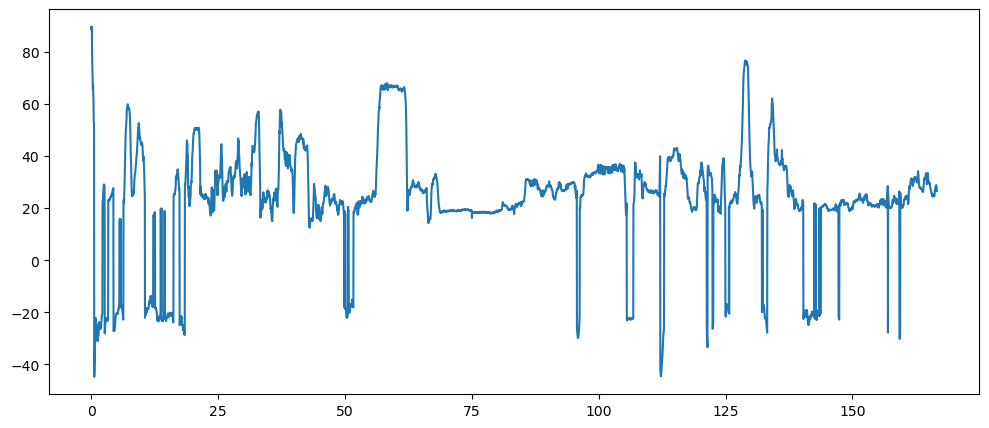

In [14]:
plt.figure( figsize = (12,5))
plt.plot(df['time'], df['rightshoulder_flex'])

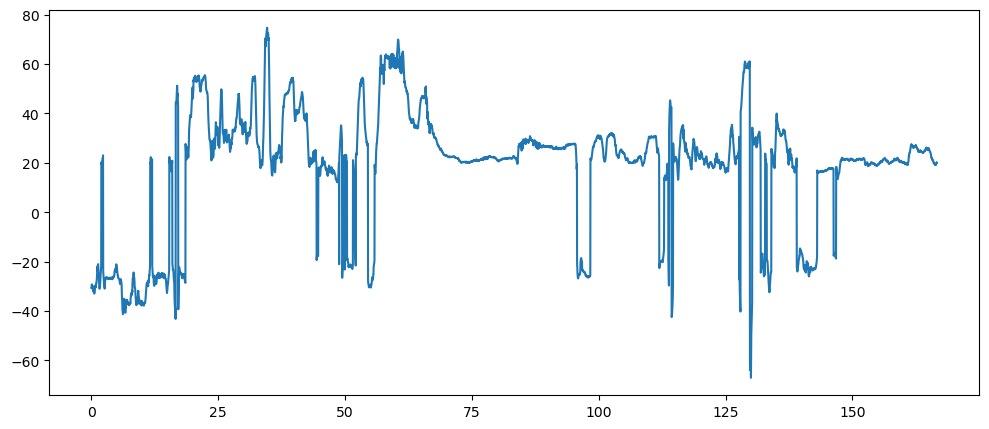

In [15]:
plt.figure( figsize = (12,5))
plt.plot(df['time'], df['leftshoulder_flex'])

#### 1.2 Shoulder ab/aduction

<a href='https://www.researchgate.net/publication/342490010_An_ergonomic_shoulder_for_robot-aided_rehabilitation_with_hybrid_control'><img src = 'https://www.researchgate.net/publication/342490010/figure/fig1/AS:960277239566349@1605959343300/Schematic-of-shoulder-abduction-adduction-and-vertical-flexion-extension.png' width = 190 style="float: left;"></a>
<img src = img/shoulder_abduc.jpeg width = 150 style="float: left;">
The movement is on the coronal plane. RoM if about 150 degrees from this [paper](https://bmcmusculoskeletdisord.biomedcentral.com/articles/10.1186/s12891-020-03665-9).

The coronal plane for the shoulder if defined as the plane spanned by <span style="color:red"> a x b</span>

Then, <span style="color:red">d</span> is projected on that plane.

Finally, compute the angle <span style="color:deeppink">alpha</span> between <span style="color:red"> dotted a </span> and <span style="color:red">projected d</span>

To know if the movement is on the external or inner body, check with the norm between <span style='color:red'>projected d</span> and <span style='color:red'> a and dotted a</span>

To know if the movement is at the top of below the shoulder, check with the <span style = 'color:red'>b and dotted b</span>

EDIT : Actually just take the angle between the vector [0, 0, -1] and projected d

In [16]:
A = df['rightshoulder'] - df['leftshoulder']
B = df['lefthip'] - df['leftshoulder']
D = df['leftelbow'] - df['leftshoulder']

A_u = [unit_vector(a) for a in A]
B_u = [unit_vector(b) for b in B]
D_u = [unit_vector(d) for d in D]
N = [np.cross(a, b) for a, b in zip(A, B)]

# d projection
N_norm = [np.linalg.norm(n) for n in N]
D_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D_u, N, N_norm)]

angle = [np.dot(d, a) for d, a in zip(D_proj, A_u)]
angle = np.arccos(angle)*180/np.pi - 90

B_dotted = df['leftshoulder'] - df['lefthip']
A_dotted = df['leftshoulder'] - df['rightshoulder']

for i in range(len(N)):
    # To define if the movement is lower or higher than the shoulder, and inner or external of body
    norm_high = np.linalg.norm(D_proj[i] - B_dotted[i])
    norm_low = np.linalg.norm(D_proj[i] - B[i])
    norm_ext = np.linalg.norm(D_proj[i] - A_dotted[i])
    norm_in = np.linalg.norm(D_proj[i] - A[i])

    if norm_in < norm_ext and norm_low < norm_high:
        continue
    elif norm_in > norm_ext and norm_low < norm_high:
        continue
    elif norm_in > norm_ext and norm_low > norm_high:
        angle[i] = 180 - angle[i]
    elif norm_in < norm_ext and norm_low > norm_high:
        angle[i] = angle[i] - 90

df['leftshoulder_abduc'] = angle

In [17]:
A = df['rightshoulder'] - df['leftshoulder']
B = df['rightshoulder'] - df['righthip']
D = df['rightshoulder'] - df['rightelbow']

A_u = [unit_vector(a) for a in A]
B_u = [unit_vector(b) for b in B]
D_u = [unit_vector(d) for d in D]
N = [np.cross(b, a) for a, b in zip(A, B)]

# d projection
N_norm = [np.linalg.norm(n) for n in N]
D_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D_u, N, N_norm)]

angle = [np.dot(d, a) for d, a in zip(D_proj, A_u)]
angle = np.arccos(angle)*180/np.pi - 90

B_dotted = df['righthip'] - df['rightshoulder']
A_dotted = df['rightshoulder'] - df['leftshoulder']

for i in range(len(N)):
    # To define if the movement is lower or higher than the shoulder, and inner or external of body
    norm_high = np.linalg.norm(D_proj[i] - B_dotted[i])
    norm_low = np.linalg.norm(D_proj[i] - B[i])
    norm_ext = np.linalg.norm(D_proj[i] - A_dotted[i])
    norm_in = np.linalg.norm(D_proj[i] - A[i])

    if norm_in < norm_ext and norm_low < norm_high:
        continue
    elif norm_in > norm_ext and norm_low < norm_high:
        continue
    elif norm_in > norm_ext and norm_low > norm_high:
        angle[i] = 180 - angle[i]
    elif norm_in < norm_ext and norm_low > norm_high:
        angle[i] = angle[i] - 90

df['rightshoulder_abduc'] = angle

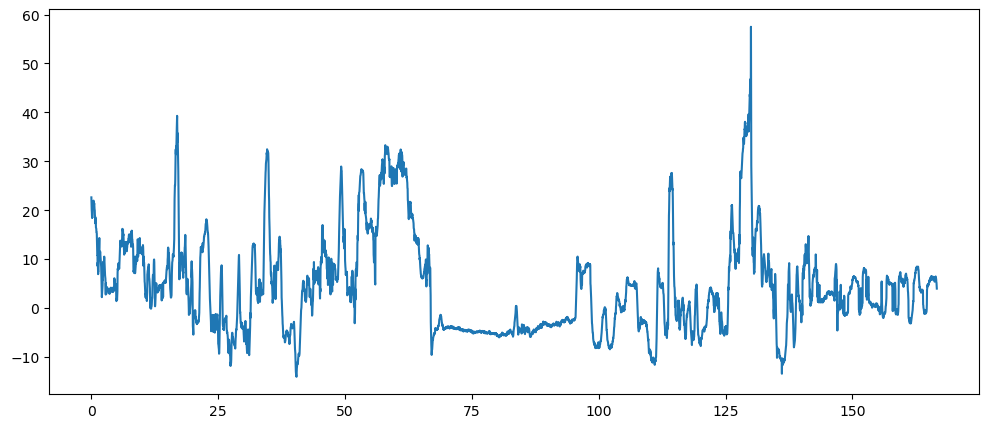

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['leftshoulder_abduc'])

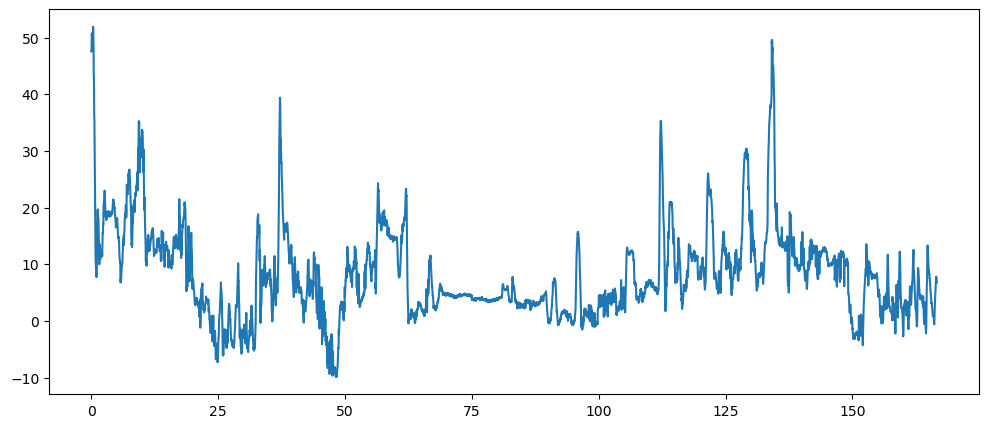

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['rightshoulder_abduc'])

#### 2. Elbow flexion
<img src='img/elbow_flex.jpeg' style="float: left;" width = 150> Here, the angle of the elbow flexion is simply the angle between <span style='color:red'>a and b</span>

In [20]:
A = df['leftshoulder'] - df['leftelbow']
B = df['leftwrist'] - df['leftelbow']

angle = [np.dot(unit_vector(a), unit_vector(b)) for a, b in zip(A, B)]
angle = np.arccos(angle)*180/np.pi

df['leftelbow_flex'] = angle

In [21]:
A = df['rightelbow'] - df['rightshoulder']
B = df['rightelbow'] - df['rightwrist']

angle = [np.dot(unit_vector(a), unit_vector(b)) for a, b in zip(A, B)]
angle = np.arccos(angle)*180/np.pi

df['rightelbow_flex'] = angle

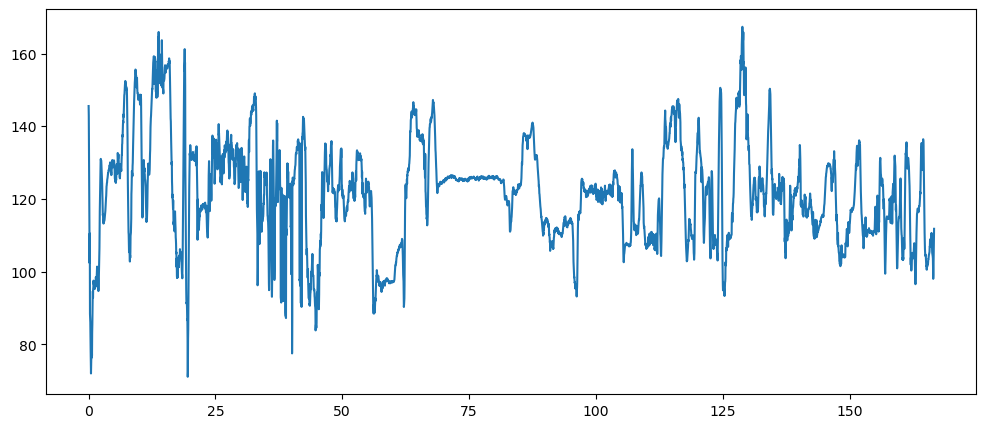

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['rightelbow_flex'])

In [23]:
df['time'][df[['rightelbow_flex']].idxmax()]

3866    128.866667
Name: time, dtype: float64

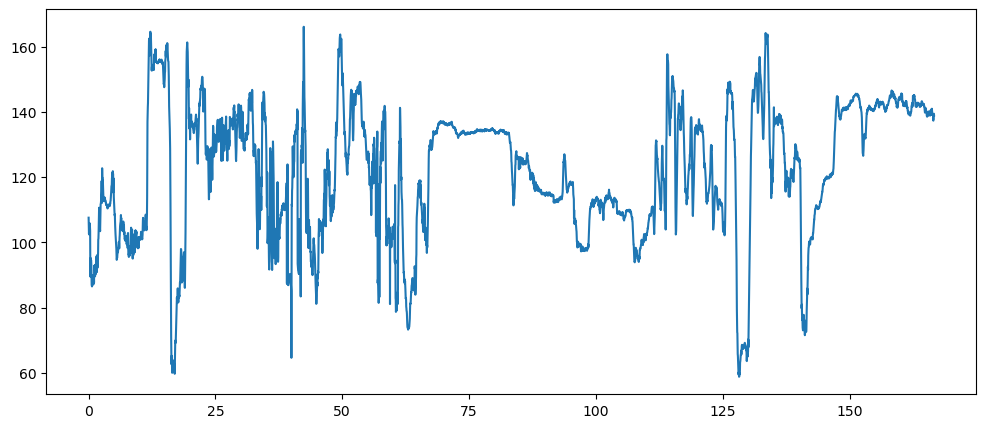

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['leftelbow_flex'])

#### 3.1 Trunk forward flexion

<img src='img/trunk_forward.jpeg' style="float: left;" width = 200> 

Here, one can simply compute the <span style='color:DeppPink'>angle</span> between the <span style='color:green'>normal vector</span> of the plan spanned by <span style='color:red'>a x b</span>, and the vertical vector which is simply [0, 0, 1].

In [25]:
A = df['rightshoulder'] - df['hips']
B = df['leftshoulder'] - df['hips']
N = [np.cross(a, b) for a, b in zip(A, B)]
v_z = np.array([0, 0, 1])

V1_u = [unit_vector(n) for n in N]
DOT = [np.dot(v1_u, v_z) for v1_u in V1_u]
angle = 90 - np.arccos(DOT)*180/np.pi

df['trunk_forward_flex'] = angle

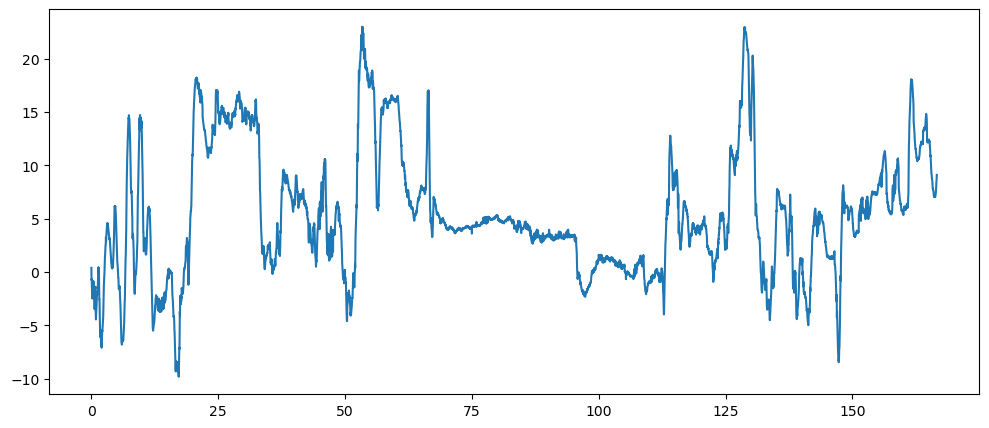

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['trunk_forward_flex'])

In [27]:
df['time'][df[['trunk_forward_flex']].idxmax()]

1601    53.366667
Name: time, dtype: float64

#### 3.2 Trunk lateral flexion
<img src='img/trunk_lateral.jpeg' width = 150 style = 'float:left'>
It is simply the angle between <span style='color:red'>a and b</span>

In [89]:
A = df['righthip'] - df['hips']
B = df['neck'] - df['hips']

A_u = [unit_vector(a) for a in A]
B_u = [unit_vector(b) for b in B]
DOT = [np.dot(a_u, b_u) for a_u, b_u in zip(A_u, B_u)]
angle = np.arccos(DOT)*180/np.pi - 90

df['trunk_lateral_flex'] = angle

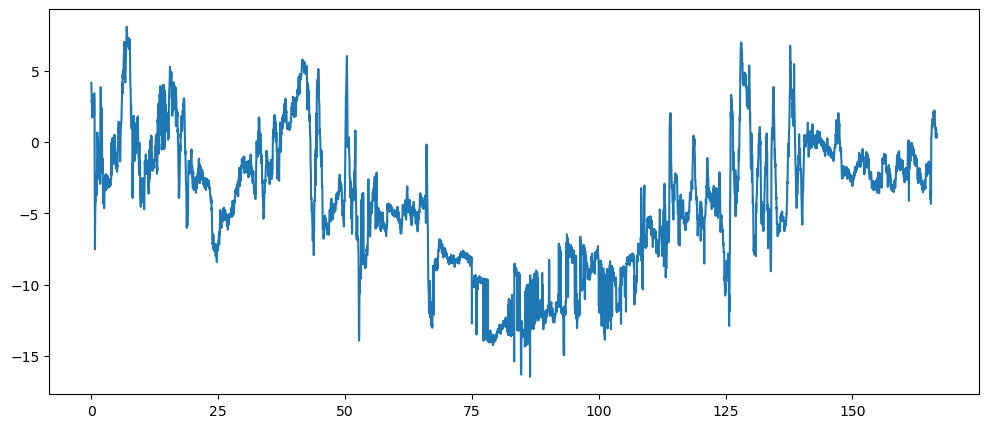

In [90]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['trunk_lateral_flex'])

#### 3.3 Trunk transverse rotation

<img src='img/trunk_rotation.jpeg' width = 200 style = 'float:left'>

From this [website](https://healthjournals.wordpress.com/2017/04/24/normative-values-for-active-lumbar-range-of-motion-in-children/), the RoM is ~30 degrees.

The movement is in the horizontal plane spanned by <span style='color:red'>a</span> and the <span style='color:green'>normale</span> =(<span style='color:red'>b x a</span>).

Then we have to project <span style='color:red'>c</span> to that plane

And finally compute the <span style='color:DeepPink'>angle</span> between <span style='color:red'>a and c</span> as shown on the view from above.

In [145]:
A = df['righthip'] - df['hips']
B = df['neck'] - df['hips']
C = df['rightshoulder'] - df['neck']
N = [np.cross(b, a) for a, b in zip(A, B)]

N2 = [np.cross(a, n) for a, n in zip(A, N)]
N2_norm = [np.linalg.norm(n2) for n2 in N2]

C_proj = [c - (np.dot(c, n2)/norm2**2)*n2 for c, n2, norm2 in zip(C, N2, N2_norm)]

A_u = [unit_vector(a) for a in A]
C_proj = [unit_vector(c) for c in C_proj]
DOT = [np.dot(a_u, c) for a_u, c in zip(A_u, C_proj)]
angle = np.arccos(DOT)*180/np.pi

# To define if it is right or left rotation 
N_behind = [np.cross(a, b) for a, b in zip(A, B)]
for i in range(len(N)):
    norm_front = np.linalg.norm(C_proj[i] - N[i])
    norm_behind = np.linalg.norm(C_proj[i] - N_behind[i])

    if norm_behind < norm_front:
        angle[i] = -angle[i]

df['trunk_rotation'] = angle

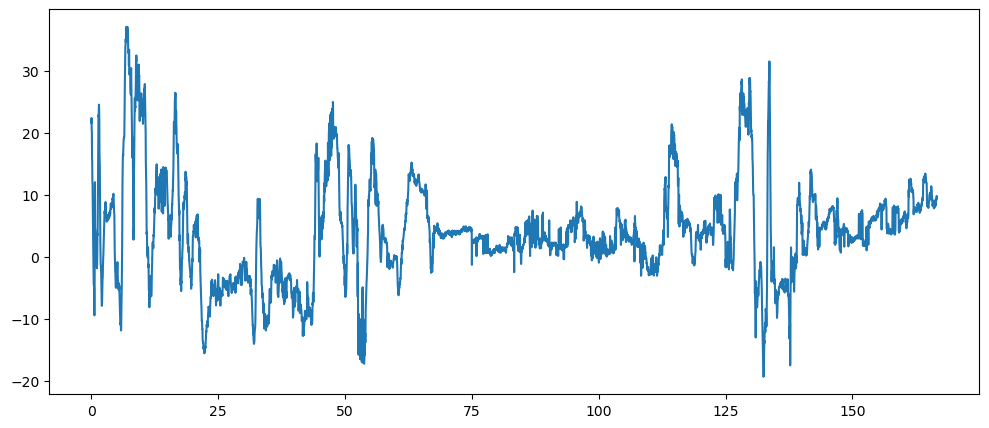

In [146]:
plt.figure(figsize=(12,5))
plt.plot(df['time'], df['trunk_rotation'])

### 4. Get angle velocities
Let's estimate the angular velocity of the right shoulder when the participant is picking the knife (flexion movement --> x axis)

In [32]:
w_shoulder_flex, std = angle_velocity2(df, 6, 7, name ='rightshoulder_flex')
print(f'The participant does the shoulder flexion movement at {w_shoulder_flex:.2f} deg/s with std of {std:.2f} when picking a knife.')

The participant does the shoulder flexion movement at 87.22 deg/s with std of 244.73 when picking a knife.


Let's estimate the same angular velocity but when the participant does not move its shoulder

In [33]:
w1_shoulder_flex, std1 = angle_velocity2(df, 70, 71, name='rightshoulder_flex')
print(f'The participant does the shoulder flexion movement at {w1_shoulder_flex:.2f} deg/s with std of {std1:.2f} when doing nothing with the right shoulder')

The participant does the shoulder flexion movement at 3.18 deg/s with std of 2.20 when doing nothing with the right shoulder


### 5. Trajectory distance and duration

#### In what unit are the axises expressed to ? meters ? centimeters ?
Let's first try to look at the height of the person (point_1 to point_16)

In [34]:
a = df['point_1'][0]
b = (df['point_15'][0] + df['point_16'][0])/2
height = np.linalg.norm(a-b)
print(f'The person height (up to the nose) is {height:.2f}.') 

The person height (up to the nose) is 1472.17.


Looks like it is in millimeter, if we assume that the person measures ~1.47m from the feet to the nose level. 
Knowing this, the room experiment should have the following dimensions : 2m(width) x 5m(length) x 2m (height).

But this is not representative to the reality since the real dimensions of the labs are 2,37m(width) x 2,8m(length) ([from EPFL website](https://plan.epfl.ch/s/YQZs))

Maybe the resulting space grid does not really represent the real labs room dimension. But there is no way for now to come up with the real dimensions. Which is not really troublesome for now since we do not really look at the real distance measured at the end for our analysis.

Lets look at the distance traveled by the right wrist when the person picks up the knife

In [35]:
distance = dist_trajectory(df, 6, 7, 'rightwrist')
time = time_trajectory(df, 6, 7)
print(f'The wrist traveled {distance:.2f} [cm or something] in {time:.2f} seconds when the person picks up a knife')

The wrist traveled 692.76 [cm or something] in 1.00 seconds when the person picks up a knife


### 6. Distance A-B length and duration
Let's look at the straight line distance at the start and end of the picking knife action for the right wrist.

In [36]:
distance_ab = distance_AB(df, 6, 7, 'rightwrist')
print(f'The straight line is about {distance_ab:.2f} [cm or something] for {time:.2f} seconds for picking a knife')

The straight line is about 676.37 [cm or something] for 1.00 seconds for picking a knife


### 7. Range of motion
Definition from this [paper](https://jneuroengrehab.biomedcentral.com/articles/10.1186/1743-0003-11-132#Sec2) RoM of each DoF was estimated by subtracting the maximum and minimum recorded angles.


In [37]:
t1 = events['cutting'][0][0]
t2 = events['cutting'][0][1]
RoM_rightelbow = RoM(df, t1, t2, 'rightelbow_angles', axis = 0)
RoM_rightelbow

KeyError: 'rightelbow_angles'

### 8. Absolute kinematic variability

Definition from this [paper](https://jneuroengrehab.biomedcentral.com/articles/10.1186/1743-0003-11-132#Sec2) : Absolute kinematic variability across the five trials was estimated as the average standard deviation (SD) across all time points of the normalized DoF angle trajectory

Pour chaque personne et chaque personne "type" d'action, calculer le SD de l'angle selon le mouvement (elbow flexion for ex.)
--> Faire la moyenne des SDs pour caractériser l'absolute kinematic variability d'une action pour une personne selon le joint movement
Ca donnera l'absolute kinematic variability chez une personne selon la tâche faite et le joint movement
(à voir s'il y a finalement une grosse différence de SDs déjà entre les personnes able-bodied...)

Ensuite, on peut encore calculer la moyenne parmi les "healthy" people, and les "amputees" pour faire une comparaison entre les 2 groupes.

On peut déjà calculer l'absolute kinematic variability pour notre personne ici.

In [ ]:
SD = []
for t1, t2 in events['picking_r']:
    idx = time_id(df, t1, t2)
    SD.append(np.std(df['rightelbow_flex'][idx[0]:idx[1]]))

np.mean(SD)

8.71341125615587

### 9. Joints position instantaneous velocity/acceleration
Respective to the body referential

Mean velocities and acceleration only for specific tasks

In [55]:
points = [point[0] for point in df['point_0']]
times = df['time']
n = len(df)
w = []
for i in range(n-1):
    w_i = (points[i+1] - points[i])/(times[i+1] - times[i])
    w.append(w_i)

n_w = len(w)
a = []
for i in range(n_w-1):
    a_i = (w[i+1] - w[i])/(times[i+1] - times[i])
    a.append(a_i)

w = [0] + w
a = [0,0] + a


In [56]:
n_w = len(w)
a = []
for i in range(n_w-1):
    a_i = (w[i+1] - w[i])/(times[i+1] - times[i])
    a.append(a_i)

w = [0] + w
a = [0,0] + a

### (10. Arm trajectory - tasks specific)
- Curvature/Linear
- Planar projection

Curvature definition from [Wikipedia](https://en.wikipedia.org/wiki/Curvature) : Intuitively, the curvature is the amount by which a curve deviates from being a straight line, or a surface deviates from being a plane. Smaller circles bend more sharply, and hence have higher curvature. The curvature of a straight line is zero.

More insights about Gaussian and Mean curvature [here](http://rodolphe-vaillant.fr/entry/33/curvature-of-a-triangle-mesh-definition-and-computation)

Python library who computes both kinds of curvature explained [here](https://trimsh.org/trimesh.curvature.html).


Should I compute the curvature ? What does it mean the "planar projection" ? Should I just compute the distance of the trajectory of the wrist ?

### 11. Center of mass of segments
Cannot compute center of mass since we don't have the masses ??
Neither center of gravity

In reality it should be centroid.. = arithmetic mean position of the points

Bras gauche, droit
Bras ensemble
épaules, hanches ensemble

### 13. Reach distance

Traveled distance by the wrist when reaching for an object.

In [547]:
events

{'picking_r': [[6, 7], [132.5, 134.5]],
 'picking_fridge': [[51, 68]],
 'cutting': [[149, 169]],
 'stirring': [[]],
 'washing': [[17, 33]]}

In [552]:
for picking in events['picking_r']:
    dist = reach_dist(df, picking[0], picking[1], right=True)
    print(dist)

692.7595818510206
1542.4946768976333


### 14. Movement complexity - Entropy
Papers : 
- [Physiological time-series analysis using approximate entropy and sample entropy](https://pubmed.ncbi.nlm.nih.gov/10843903/)
- [Multiscale entropy analysis of complex physiologic time series](https://pubmed.ncbi.nlm.nih.gov/12190613/)
This paper focus specifically on diseased systems who are associated with emergence of more regular behavior.

--> Does an amputee have more or less regular behavior than the able-bodied people ? Does it depend on tasks ?
This one introduces the Multiscale Entropy (MSE) as a measure of entropy.
- [Changes of human movement complexity during maturation: quantitative assessment using multiscale entropy ](https://pubmed.ncbi.nlm.nih.gov/29521114/)

This paper presents the movement complexity as the capability of using different strategies to accomplish a specific task and is expected to increase with maturation. Multiscale Entropy (MSE) has been proposed to estimate complexity on different kinematic signals, at different time scales. This paper explores whether a MSE decrease was dependent on the specific task analysed and resulted from the concurrent increase in gait automaticity.
Motor  development  beyond  infancy  is  characterized  by  a  gradual  increase  in  agility,  adaptability,  and  abil-ity  to  make  complex  movement  sequences

--> Depending on this, could we say that an amputee is less efficient in general if the entropy is higher or lower ? 

- [Movement Variability and the Use of Nonlinear Tools: Principles to Guide Physical Therapist Practice](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2652347/)
This paper explores the fact that health is indicated by a dynamic equilibirum that is not a static state. Meaning that variability reflects multiple options for movement, providing for flexible, adaptive strategies that are not reliant on rigid programs for each task or for each changing condition encountered.
Variability reflects important information for the maintenance of the health of the system.

The lack of variability in movement lads to abnormal mapping of the sensory cortex which subsequently disturbs motor function.

--> Meaning that an amputee has less movement variability compared to an able-bodied person ?

But decreased variability also results from the efficient execution of a given movement pattern. Although a very stable behavioral state is supported by a very rich behavioral repertoire. Thereforee it seems that variability does not decrease when we develop and refine a stable behavioral state, but actually increases.

Moreover, the use of linear measures (traditional measures of dispersion) such as range or std, do not quantify stability of postural control system, since it is possible to have a large area of the COP path while having a stable posture or an unstable posture. It only quantifies the magnitude of sway but not the temporally evolving dynamics (or disequilibirum) of postural control. Linear measure only provide insight into the amount of variability.

Nonlinear tools give additional information such as evolution of the movement over time.

A study of coordination variability in jumpers revealed a U-shaped curve in the progression of variability. Initially, there is high variability as different strategies are attempted. Then there is a reduced variability as the jumper performs more successfully. Finally, as the jumper becomes an expert, the variability increases, meaning increasing flexibility of skill to allow adaptation to perturbations.

### 14. Movement variability


### 15. Joint coupling/correlation
- [Inter-joint coupling and joint angle synergies of human catching movements](https://www.sciencedirect.com/science/article/pii/S0167945709000396?via%3Dihub)

This concept assumes that the various degrees of freedom (DoFs) of a motor system are not controlled independently but instead are coupled in their actions. In theory, this would lead to a reduction of the effective number of DoFs to a level that can be controlled more easily by the CNS. 

PCA is a common tool in the analysis of motor behavior and often reveals evidence of fundamental building blocks of the studied movements. One advantage of PCA is that it captures covariant and, thus, coupled DoFs in a very intuitive manner. An important second reason for the use of PCA in the study presented here was that PCA only considers linear correlations among DoFs which can be considered as the most-simple, i.e., minimal model of inter-joint coupling.

They assumed that the linearly correlated DoFs of each significant PC represent cardinal joint angle synergies

From this [website](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/), I could just first check on correlation between all the DoF of joints. I should choose the Spearman correlation, to avoid the assumption of a normal distribution of my variables ?



Correlation for time series

In [76]:
joints_DoF = ['leftshoulder_flex', 'rightshoulder_flex', 'leftshoulder_abduc',
              'rightshoulder_abduc', 'leftelbow_flex', 'rightelbow_flex',
              'trunk_forward_flex', 'trunk_lateral_flex', 'trunk_rotation']

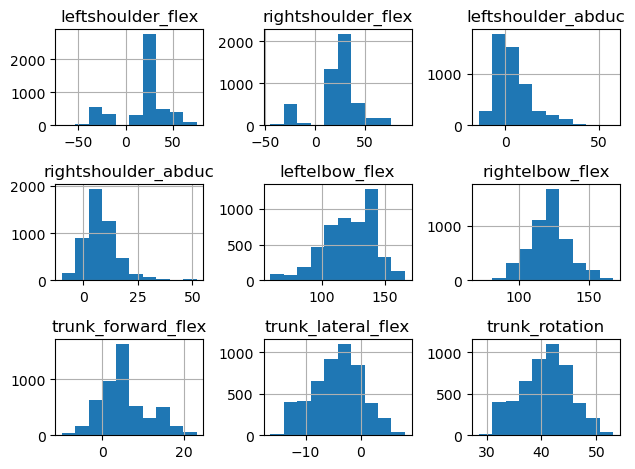

In [78]:
df[joints_DoF].hist()
plt.tight_layout()

As previously shown, not all variables are normally distributed, but let's still try to do Pearman correlation.

<Axes: >

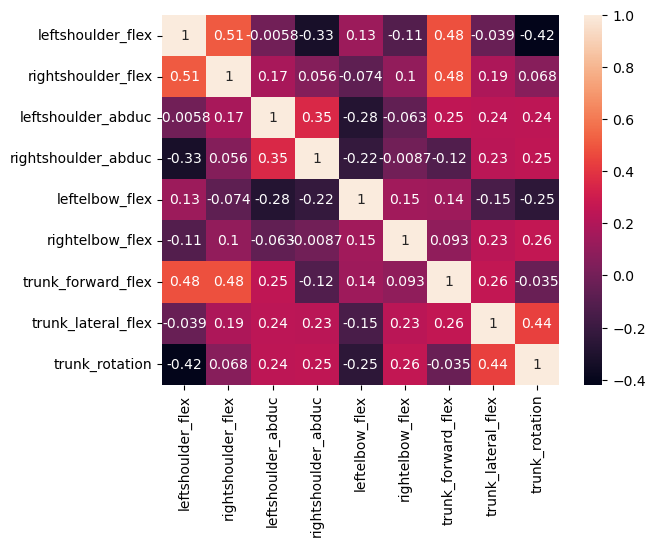

In [151]:
corr = df[joints_DoF].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True)


Lets plot the correlation matrix only during specific events such as cutting

<Axes: >

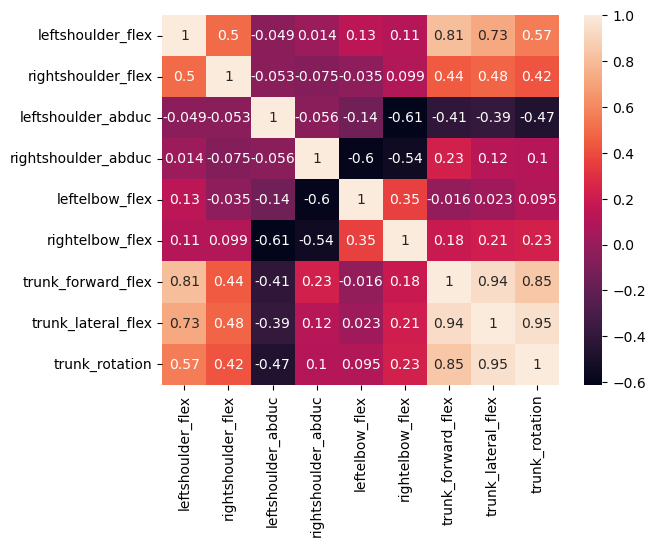

In [157]:
t1, t2 = time_id(df, events['cutting'][0][0], events['cutting'][0][1])
corr_cutting = df[joints_DoF][t1:t2].corr()
sns.heatmap(corr_cutting, xticklabels=corr_cutting.columns.values, yticklabels=corr_cutting.columns.values, annot = True)

Not convincing, let's try to do [PCA](https://www.datacamp.com/tutorial/principal-component-analysis-in-python), a linear dimensionality reduction.

In [529]:
# First standardize data
standardized_df = pd.DataFrame()
for joint in joints_DoF:
    standardized_df[joint] = (df[joint] - df[joint].mean()) / df[joint].std()

In [544]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=3)
principalComponents_df = pca_df.fit_transform(standardized_df)

SyntaxError: invalid syntax (3576260756.py, line 2)

In [538]:
princcomp_Df = pd.DataFrame(data = principalComponents_df, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
princcomp_Df.tail()

,principal component 1,principal component 2,principal component 3
4995,0.149391,0.553364,0.429401
4996,0.197363,0.607844,0.217609
4997,0.187139,0.670111,-0.030219
4998,0.245272,0.687877,-0.266269
4999,0.208979,0.697671,-0.394006


In [546]:
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))


Explained variation per principal component: [0.25053222 0.23613487 0.14846494]


## Exploratory part (plots)

### Events labellisation

During **picking**, there is usually : 
- Elbow extension
- Shoudler flexion/abduction
- Trunk rotation (maybe)
- Trunk forward flexion
- Trunk lateral flexion (maybe if it is too far away)
well all kind of movements basically

During **cutting** : 
- Elbow flexion
- Shoulder flexion/abduction

Later on, see if there is any difference between soft/hard vegetables, if they require different kind of movements

During **stirring**:
- Elbow flexion
- Shoulder flexion/abduction

In [ ]:
events

{'picking_r': [[6, 7], [132.5, 134.5]],
 'cutting': [[149, 169]],
 'stirring': [[]],
 'washing': [[17, 33]]}

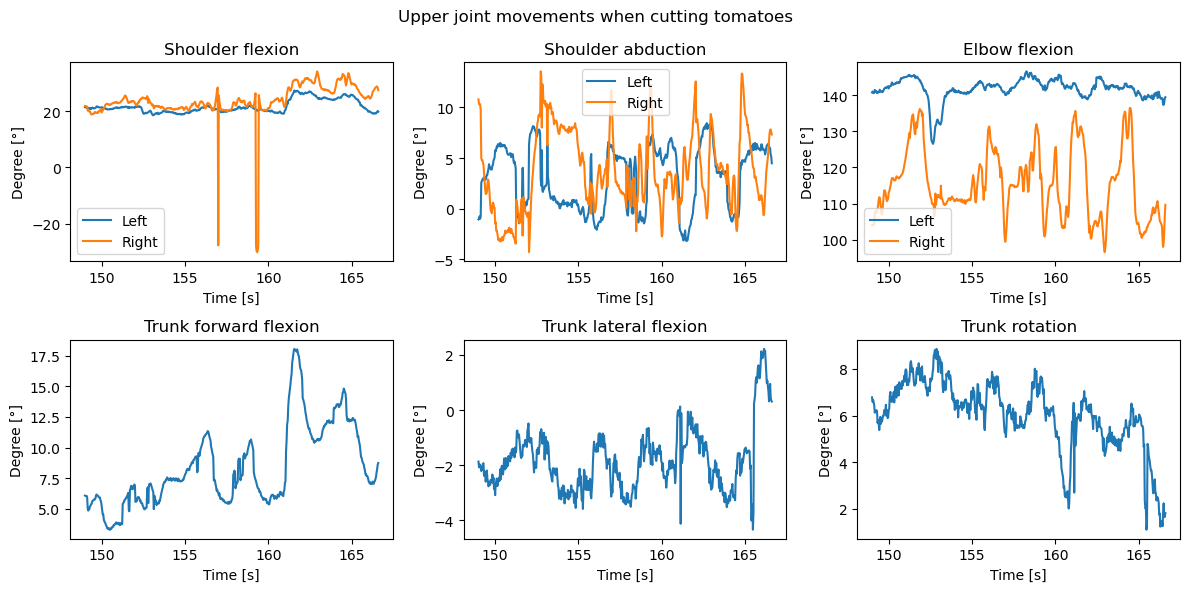

In [ ]:
t1, t2 = time_id(df, events['cutting'][0][0], events['cutting'][0][1])
fig = plt.figure(figsize=(12, 6))
x = df['time'][t1:t2]
fig.suptitle('Upper joint movements when cutting tomatoes')

plt.subplot(2, 3, 1)
plt.plot(x, df['leftshoulder_flex'][t1:t2], label = 'Left')
plt.plot(x, df['rightshoulder_flex'][t1:t2], label = 'Right')
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Shoulder flexion')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(x, df['leftshoulder_abduc'][t1:t2], label = 'Left')
plt.plot(x, df['rightshoulder_abduc'][t1:t2], label = 'Right')
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Shoulder abduction')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(x, df['leftelbow_flex'][t1:t2], label = 'Left')
plt.plot(x, df['rightelbow_flex'][t1:t2], label = 'Right')
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Elbow flexion')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(x, df['trunk_forward_flex'][t1:t2])
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Trunk forward flexion')

plt.subplot(2, 3, 5)
plt.plot(x, df['trunk_lateral_flex'][t1:t2])
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Trunk lateral flexion')

plt.subplot(2, 3, 6)
plt.plot(x, df['trunk_rotation'][t1:t2])
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Trunk rotation')

plt.tight_layout()
plt.show()

In [ ]:
# loading video dsa gfg intro video 
clip = VideoFileClip("../data/small_data/merge_rgbposes.mp4") 
      
# getting only first 5 seconds 
clip = clip.subclip(events['cutting'][0][0], events['cutting'][0][1]) 
   
# showing  clip 
#clip.ipython_display(width = 360)
clip.write_videofile("cutting.mp4")

Moviepy - Building video cutting.mp4.
Moviepy - Writing video cutting.mp4



Moviepy - Done !
Moviepy - video ready cutting.mp4


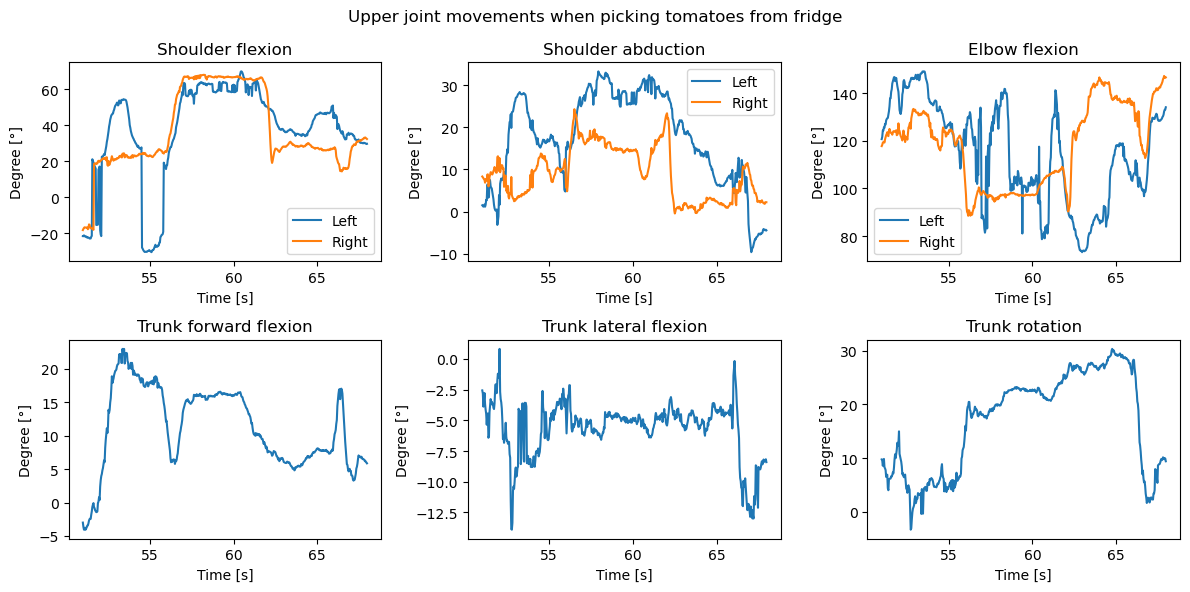

In [ ]:
t1, t2 = time_id(df, events['picking_fridge'][0][0], events['picking_fridge'][0][1])
fig = plt.figure(figsize=(12, 6))
x = df['time'][t1:t2]
fig.suptitle('Upper joint movements when picking tomatoes from fridge')

plt.subplot(2, 3, 1)
plt.plot(x, df['leftshoulder_flex'][t1:t2], label = 'Left')
plt.plot(x, df['rightshoulder_flex'][t1:t2], label = 'Right')
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Shoulder flexion')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(x, df['leftshoulder_abduc'][t1:t2], label = 'Left')
plt.plot(x, df['rightshoulder_abduc'][t1:t2], label = 'Right')
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Shoulder abduction')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(x, df['leftelbow_flex'][t1:t2], label = 'Left')
plt.plot(x, df['rightelbow_flex'][t1:t2], label = 'Right')
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Elbow flexion')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(x, df['trunk_forward_flex'][t1:t2])
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Trunk forward flexion')

plt.subplot(2, 3, 5)
plt.plot(x, df['trunk_lateral_flex'][t1:t2])
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Trunk lateral flexion')

plt.subplot(2, 3, 6)
plt.plot(x, df['trunk_rotation'][t1:t2])
plt.ylabel('Degree [°]')
plt.xlabel('Time [s]')
plt.title('Trunk rotation')

plt.tight_layout()
plt.show()

In [ ]:
# loading video dsa gfg intro video 
clip = VideoFileClip("../data/small_data/merge_rgbposes.mp4") 
      
# getting only first 5 seconds 
clip = clip.subclip(events['picking_fridge'][0][0], events['picking_fridge'][0][1]) 
   
# showing  clip 
#clip.ipython_display(width = 360)
clip.write_videofile("fridge.mp4")

Moviepy - Building video fridge.mp4.
Moviepy - Writing video fridge.mp4



Moviepy - Done !
Moviepy - video ready fridge.mp4


### Plot a video part

In [ ]:
"""
# loading video dsa gfg intro video 
clip = VideoFileClip("../data/small_data/merge_rgbposes.mp4") 
      
# getting only first 5 seconds 
clip = clip.subclip(6, 7) 
   
# showing  clip 
#clip.ipython_display(width = 360)
clip.write_videofile("test.mp4")
"""

### Plot absolute kinematic variability

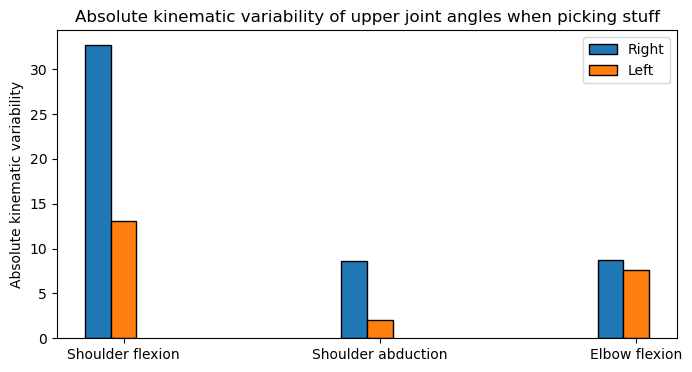

In [ ]:
keys_left = ['leftshoulder_flex', 'leftshoulder_abduc', 'leftelbow_flex']
keys_right = ['rightshoulder_flex', 'rightshoulder_abduc', 'rightelbow_flex']

SD_r = []
abs_SD_r = []
for key in keys_right:
    SD_r = []
    for t1, t2 in events['picking_r']:
        idx = time_id(df, t1, t2)
        SD_r.append(np.std(df[key][idx[0]:idx[1]]))
    abs_SD_r.append(np.mean(SD_r))

SD_l = []
abs_SD_l = []
for key in keys_left:
    SD_l = []
    for t1, t2 in events['picking_r']:
        idx = time_id(df, t1, t2)
        SD_l.append(np.std(df[key][idx[0]:idx[1]]))
    abs_SD_l.append(np.mean(SD_l))

# width of the bars
barWidth = 0.1

# The x position of bars
r1 = np.arange(len(abs_SD_l))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(8,4))

plt.bar(x = r1, height = abs_SD_r, width = barWidth, label = 'Right', edgecolor = 'black')
plt.bar(x = r2, height = abs_SD_l, width = barWidth, label = 'Left', edgecolor = 'black')
# general layout
plt.xticks([r + barWidth for r in range(len(abs_SD_l))], ['Shoulder flexion', 'Shoulder abduction', 'Elbow flexion'])

plt.title('Absolute kinematic variability of upper joint angles when picking stuff')
plt.ylabel('Absolute kinematic variability')
plt.legend()
plt.show()

### Plot Range of Motion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


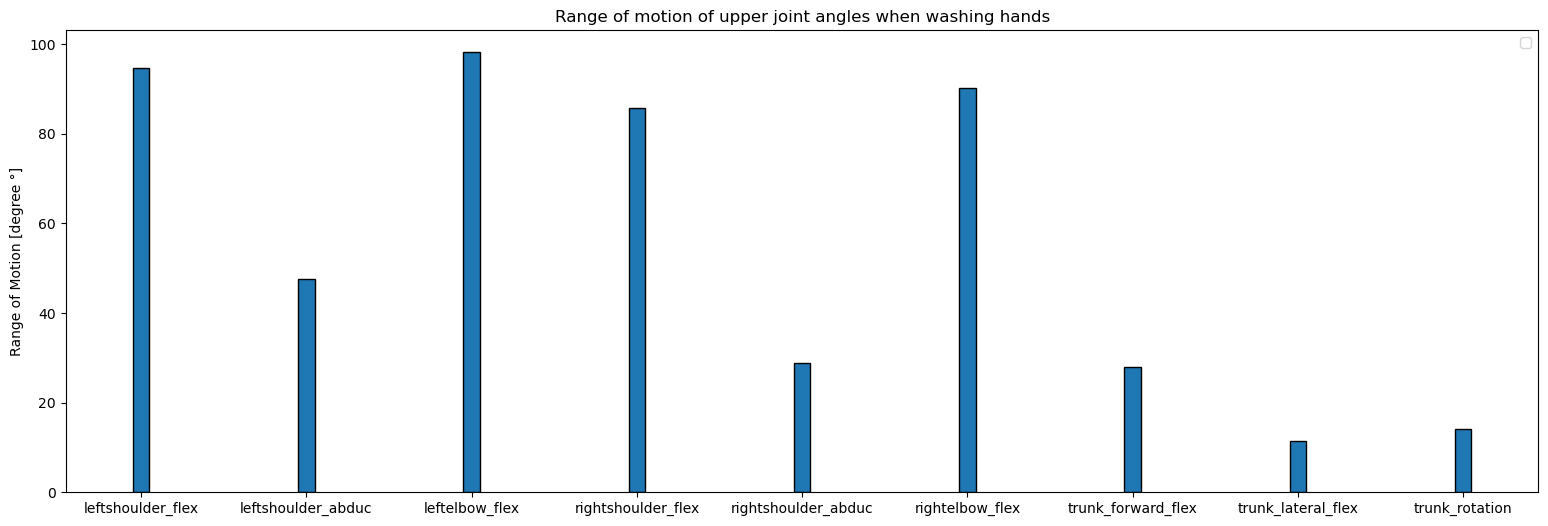

In [ ]:
keys = ['leftshoulder_flex', 'leftshoulder_abduc', 'leftelbow_flex',
        'rightshoulder_flex', 'rightshoulder_abduc', 'rightelbow_flex',
        'trunk_forward_flex', 'trunk_lateral_flex', 'trunk_rotation']

t1 = events['washing'][0][0]
t2 = events['washing'][0][1]
id1, id2 = time_id(df, t1, t2)
RoM = []
for key in keys:
        angle_max = df[key][id1:id2].max()
        angle_min = df[key][id1:id2].min()
        RoM.append(angle_max - angle_min)

plt.figure(figsize=(19,6))

plt.bar(x = keys, height = RoM, width = 0.1, edgecolor = 'black')

plt.title('Range of motion of upper joint angles when washing hands')
plt.ylabel('Range of Motion [degree °]')
plt.legend()
plt.show()


# Check features on test data

In [604]:
data_npy_path = "../data/data_test_31.07.npy"
data_npy = np.load(data_npy_path)

df_test = pd.DataFrame()
df_test['time'] = np.array([time/30 for time in range(len(data_npy))])
for i in range(17):
    df_point = pd.DataFrame(data_npy[:, i])
    df_test[f'point_{i}'] = df_point[[0, 1, 2]].to_numpy().tolist()
    df_test[f'point_{i}'] = [np.array(point) for point in df_test[f'point_{i}']]
df_test.rename(columns = {'point_0': 'nose', 'point_1': 'lefteye',
                          'point_2': 'righteye', 'point_3': 'leftear', 'point_4': 'rightear',
                          'point_5':'leftshoulder', 'point_6':'rightshoulder', 
                          'point_8':'rightelbow', 'point_7':'leftelbow', 
                          'point_10':'rightwrist', 'point_9':'leftwrist',
                          'point_12':'righthip', 'point_11':'lefthip',
                          'point_13': 'leftknee', 'point_14': 'rightknee',
                          'point_15': 'leftfoot', 'point_16': 'rightfoot'}, inplace = True)

joints = ['leftshoulder_flex', 'rightshoulder_flex', 'leftshoulder_abduc',
       'rightshoulder_abduc', 'leftelbow_flex', 'rightelbow_flex',
       'trunk_forward_flex', 'trunk_lateral_flex', 'trunk_rotation']

# Add joints DoF
add_joint_angles(df_test)
add_joint_velocities(df_test, joints)
df_test.head()

,time,nose,lefteye,righteye,leftear,rightear,leftshoulder,rightshoulder,leftelbow,rightelbow,...,trunk_rotation,leftshoulder_flex_w,rightshoulder_flex_w,leftshoulder_abduc_w,rightshoulder_abduc_w,leftelbow_flex_w,rightelbow_flex_w,trunk_forward_flex_w,trunk_lateral_flex_w,trunk_rotation_w
0,0.000000,"[1.4203768968582153, 0.22790828347206116, -0.1...","[1.3789992332458496, 0.2570020258426666, -0.15...","[1.4187629222869873, 0.21020182967185974, -0.1...","[1.2778023481369019, 0.2352420687675476, -0.13...","[1.3698530197143555, 0.13362517952919006, -0.0...","[1.1613520383834839, 0.163137286901474, -0.315...","[1.3691169023513794, -0.06086578592658043, -0....","[1.1663161516189575, 0.1162039265036583, -0.55...","[1.3952980041503906, -0.21959546208381653, -0....",...,-3.028625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.033333,"[1.4359174966812134, 0.20054295659065247, -0.1...","[1.3901803493499756, 0.2325197458267212, -0.12...","[1.4204373359680176, 0.18427786231040955, -0.0...","[1.2869935035705566, 0.21611925959587097, -0.1...","[1.357635736465454, 0.11109470576047897, -0.05...","[1.2050440311431885, 0.1724885106086731, -0.31...","[1.328712821006775, -0.09892138838768005, -0.1...","[1.195428490638733, 0.08612745255231857, -0.54...","[1.3701063394546509, -0.21504652500152588, -0....",...,-2.642602,-340.141161,-14.223565,-340.141161,-14.223565,-190.204832,-44.047783,-230.583216,27.898441,11.580697
2,0.066667,"[1.446121096611023, 0.17273637652397156, -0.10...","[1.397917628288269, 0.2061394453048706, -0.102...","[1.4181302785873413, 0.15745863318443298, -0.0...","[1.2991520166397095, 0.19212400913238525, -0.1...","[1.3467096090316772, 0.08603525906801224, -0.0...","[1.2627005577087402, 0.16865640878677368, -0.3...","[1.2823758125305176, -0.12920641899108887, -0....","[1.2243802547454834, 0.05560227483510971, -0.5...","[1.3467706441879272, -0.20490697026252747, -0....",...,-1.493025,-298.679534,88.310985,-298.679534,88.310985,-189.101193,22.137420,-244.416470,-0.937374,34.487318
3,0.100000,"[1.4512706995010376, 0.13994993269443512, -0.0...","[1.4042962789535522, 0.1760387122631073, -0.08...","[1.4133623838424683, 0.12798461318016052, -0.0...","[1.3135511875152588, 0.1657094955444336, -0.13...","[1.3352007865905762, 0.06090858578681946, -0.0...","[1.325296401977539, 0.14600779116153717, -0.32...","[1.2307581901550293, -0.14296570420265198, -0....","[1.2528610229492188, 0.024440571665763855, -0....","[1.3312010765075684, -0.1866232454776764, -0.4...",...,-0.749796,-653.520109,203.332825,-188.449109,203.332825,-116.237780,103.359475,-261.374405,-22.880020,22.296854
4,0.133333,"[1.45199453830719, 0.10608241707086563, -0.050...","[1.409400224685669, 0.14427274465560913, -0.06...","[1.4048922061920166, 0.09999392181634903, -0.0...","[1.3317865133285522, 0.13461142778396606, -0.1...","[1.3220231533050537, 0.03828691691160202, -0.0...","[1.3874506950378418, 0.09954171627759933, -0.3...","[1.1893951892852783, -0.13630467653274536, -0....","[1.2805843353271484, -0.013208337128162384, -0...","[1.3186519145965576, -0.1686132550239563, -0.4...",...,0.098651,42.579471,182.341002,-42.579471,182.341002,-80.122256,138.697650,-248.810247,6.863251,25.453417



(<unknown>:43460): GStreamer-CRITICAL **: 16:35:08.785: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@80171.506] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements


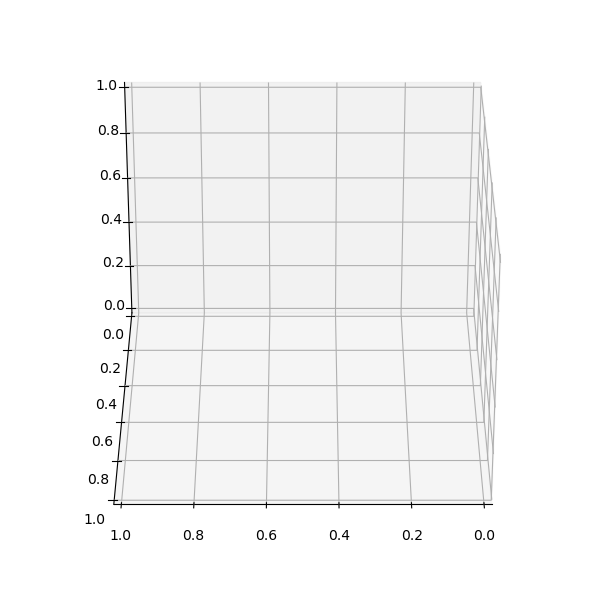

In [622]:
video_skeleton('check_trunk_31.07', df_test, 192, 250)

In [613]:
data_npy_path = "../data/test.npy"
data_npy = np.load(data_npy_path)

df_test2 = pd.DataFrame()
df_test2['time'] = np.array([time/30 for time in range(6310)])
for i in range(17):
    df_point = pd.DataFrame(data_npy[:, i])
    df_test2[f'point_{i}'] = df_point[[0, 1, 2]].to_numpy().tolist()
    df_test2[f'point_{i}'] = [np.array(point) for point in df_test2[f'point_{i}']]
df_test2.rename(columns = {'point_0': 'nose', 'point_1': 'lefteye',
                          'point_2': 'righteye', 'point_3': 'leftear', 'point_4': 'rightear',
                          'point_5':'leftshoulder', 'point_6':'rightshoulder', 
                          'point_8':'rightelbow', 'point_7':'leftelbow', 
                          'point_10':'rightwrist', 'point_9':'leftwrist',
                          'point_12':'righthip', 'point_11':'lefthip',
                          'point_13': 'leftknee', 'point_14': 'rightknee',
                          'point_15': 'leftfoot', 'point_16': 'rightfoot'}, inplace = True)

joints = ['leftshoulder_flex', 'rightshoulder_flex', 'leftshoulder_abduc',
       'rightshoulder_abduc', 'leftelbow_flex', 'rightelbow_flex',
       'trunk_forward_flex', 'trunk_lateral_flex', 'trunk_rotation']

# Add joints DoF
add_joint_angles(df_test2)
add_joint_velocities(df_test2, joints)

## Joint angular instantaneous velocities

### Joint position/velocity/acceleration instantaneous

In [755]:
keys = ['nose', 'lefteye', 'righteye', 'leftear', 'rightear',
       'leftshoulder', 'rightshoulder', 'leftelbow', 'rightelbow',
       'leftwrist', 'rightwrist', 'lefthip', 'righthip', 'leftknee',
       'rightknee', 'leftfoot', 'rightfoot']

In [395]:
times = df_test['time']
n = len(df_test) - 1
for key in keys:
    velocities = [0]
    for i in range(n):
        a = df_test[key][i]
        b = df_test[key][i+1]
        dist = np.linalg.norm(b-a)
        w = dist/(times[i+1] - times[i])
        velocities.append(w)
    df_test[key +'_w'] = velocities


In [396]:
for key in keys:
    accelerations = [0,0]
    w = df_test[key+'_w']
    for i in range(n-1):
        a_i = (w[i+1] - w[i])/(times[i+1] - times[i])
        accelerations.append(a_i)

    df_test[key+'_a'] = accelerations

In [298]:
#df_test.to_csv('Changling_features.csv')

## Lets check all joint angles


(<unknown>:43460): GStreamer-CRITICAL **: 10:11:33.090: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@38774.795] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@38774.796] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): videos/trunk_rot.avi in function 'icvExtractPattern'




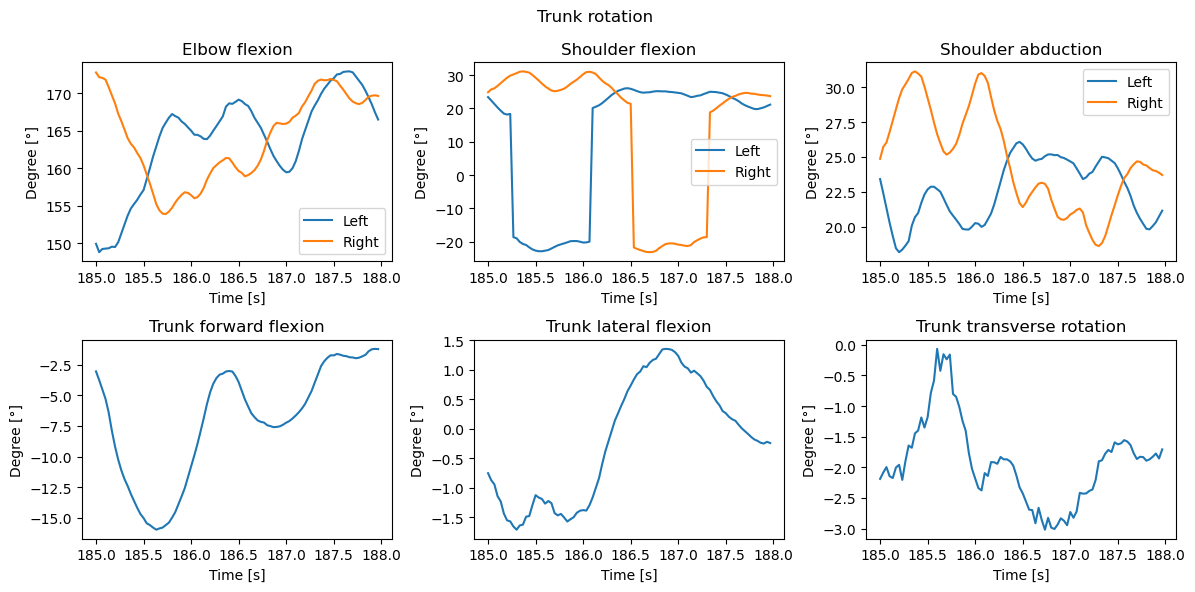

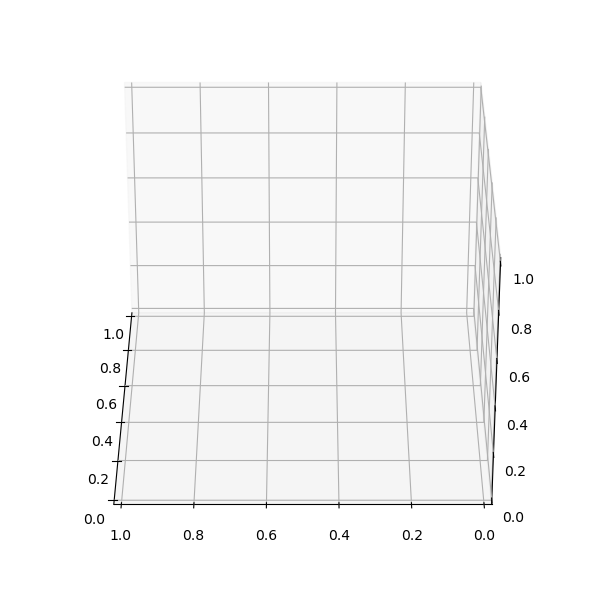

In [492]:
plot_all_joints(df_test, 185, 188, 'Trunk rotation')
video_skeleton('trunk_rot', df_test, 185, 188)


(<unknown>:43460): GStreamer-CRITICAL **: 10:08:59.906: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@38622.433] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@38624.740] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): videos/trunk_lat_flex.avi in function 'icvExtractPattern'




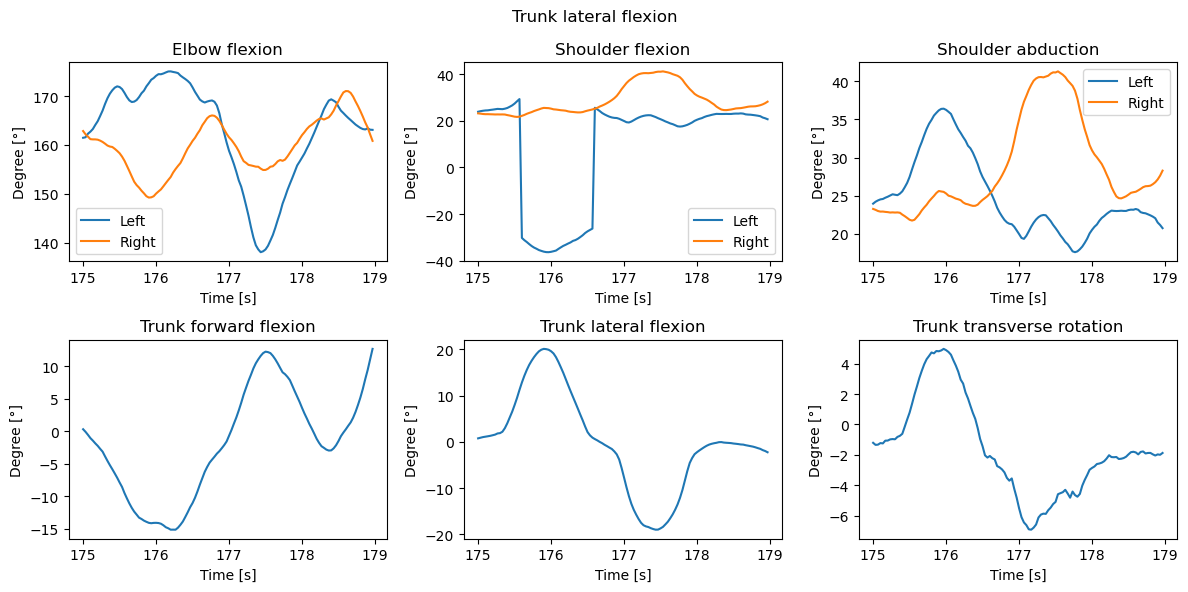

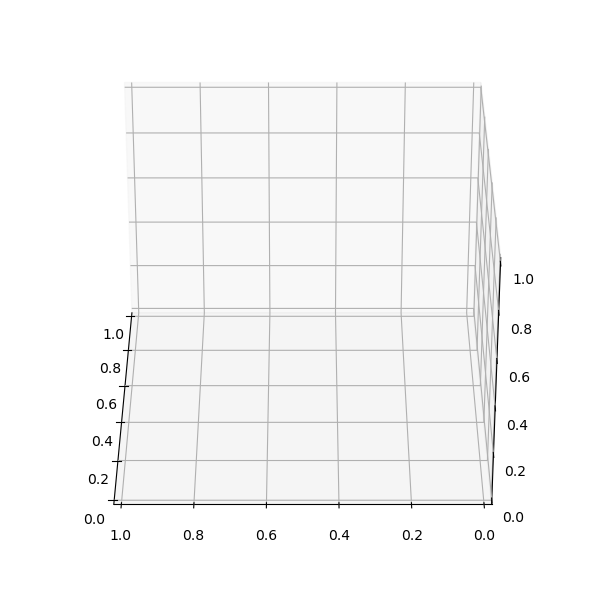

In [491]:
plot_all_joints(df_test, 175, 179, 'Trunk lateral flexion')
video_skeleton('trunk_lat_flex', df_test, 175, 179)


(<unknown>:43460): GStreamer-CRITICAL **: 09:58:02.328: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@37964.079] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@37964.151] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): videos/trunk_fwd_flex.avi in function 'icvExtractPattern'




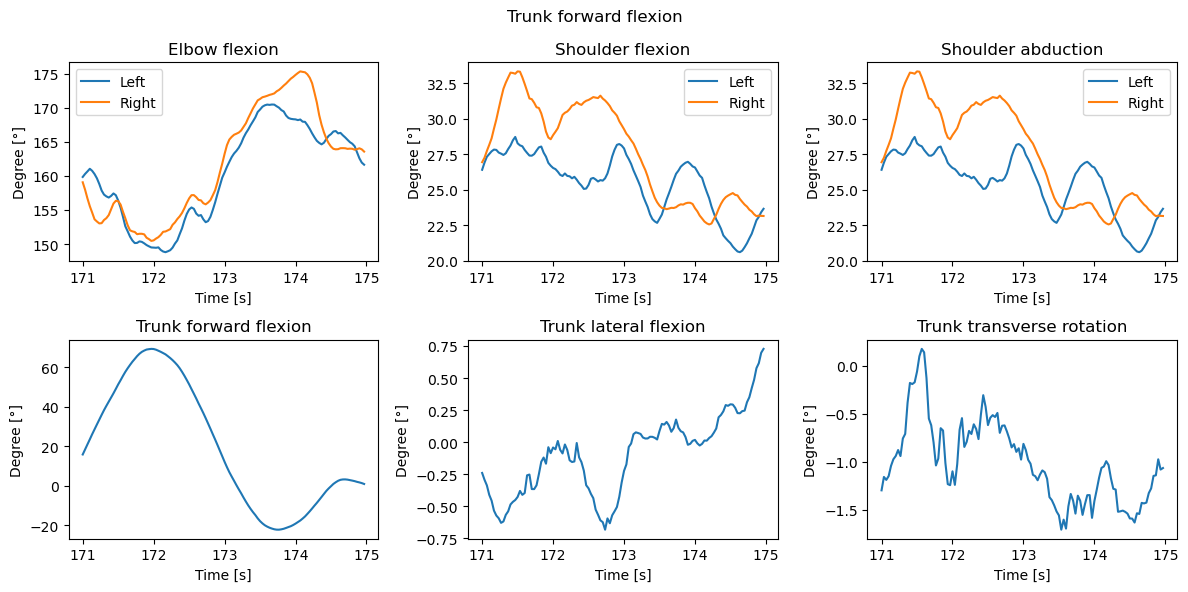

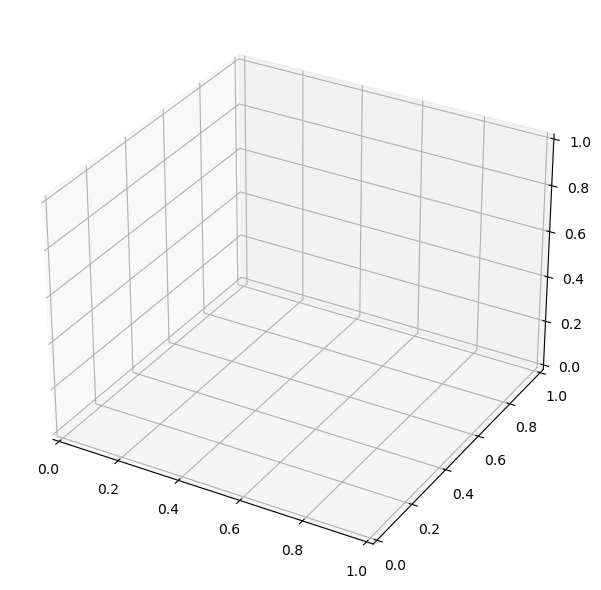

In [489]:
plot_all_joints(df_test, 171, 175, 'Trunk forward flexion')
#video_skeleton('trunk_fwd_flex', df_test, 171, 175)

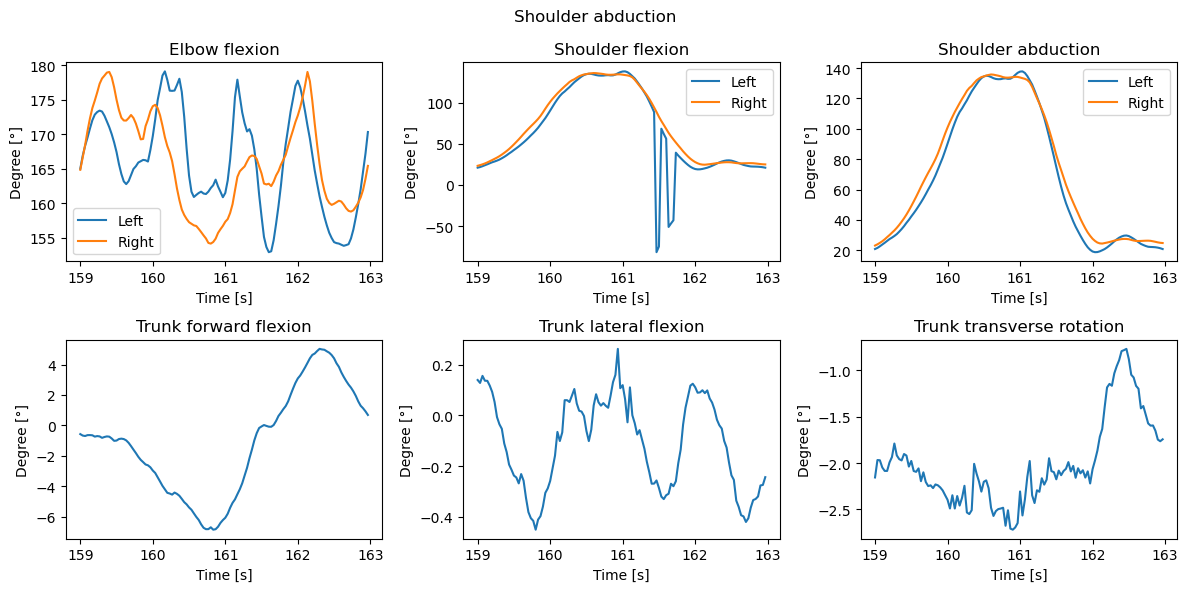

In [485]:
plot_all_joints(df_test, 159, 163, 'Shoulder abduction')
#video_skeleton('shoulder_abduc', df_test, 159, 163)

In [407]:
events_test

{'elbow': [[149, 155], [163, 167]],
 'shoulder_flex': [[155, 159]],
 'shoulder_abd': [[159, 163]],
 'trunk_fwd_flex': [[171, 175]],
 'trunk_lat_flex': [[175, 179]],
 'trunk_rot': [[185, 188]]}

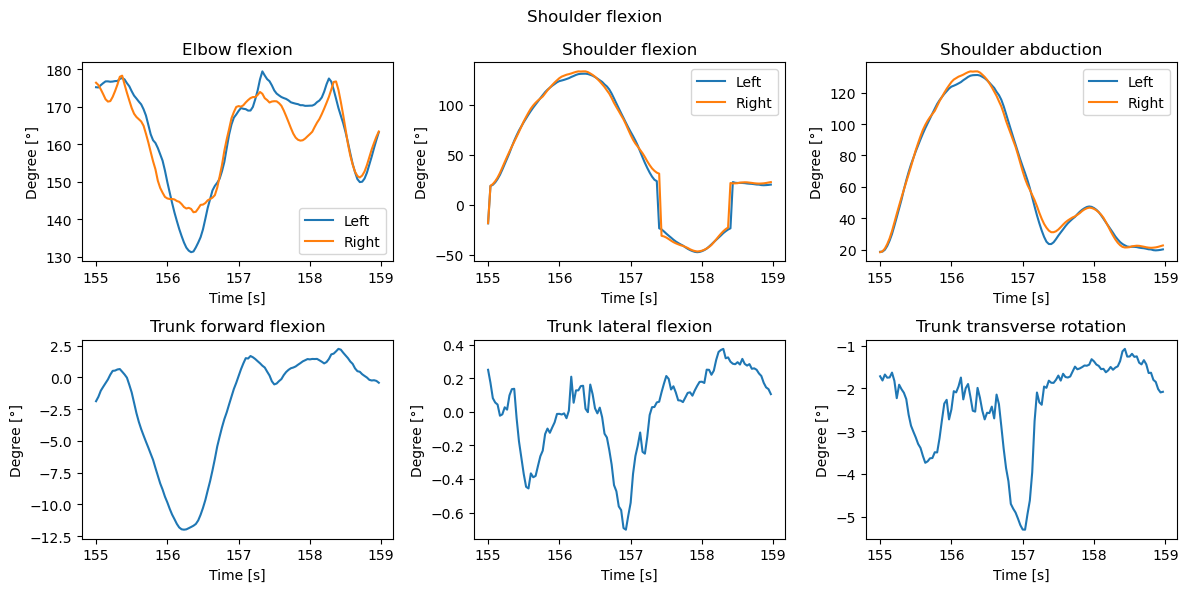

In [486]:
plot_all_joints(df_test, 155, 159, 'Shoulder flexion')
#video_skeleton('shoulder_flex', df_test, 155, 159)


### Shoulder flex/abduc are weird, lets test them

In [521]:
#shoulder flex
A_l = df_test['rightshoulder'] - df_test['leftshoulder']
B_l = df_test['lefthip'] - df_test['leftshoulder']
B_l = [unit_vector(b) for b in B_l]
D_l = df_test['leftelbow'] - df_test['leftshoulder']
D_l = [unit_vector(d) for d in D_l]
N_l = [np.cross(a, b) for a, b in zip(A_l, B_l)]
N2_l = [np.cross(n, b) for n, b in zip(N_l, B_l)]
N2_norm_l = [np.linalg.norm(n) for n in N2_l]

A_r = df_test['leftshoulder'] - df_test['rightshoulder']
B_r = df_test['righthip'] - df_test['rightshoulder']
B_r = [unit_vector(b) for b in B_r]
D_r = df_test['rightelbow'] - df_test['rightshoulder']
D_r = [unit_vector(d) for d in D_r]
N_r = [np.cross(b, a) for a, b in zip(A_r, B_r)]
N2_r = [np.cross(b, n) for n, b in zip(N_r, B_r)]
N2_norm_r = [np.linalg.norm(n) for n in N2_r]
#Je vais faire la normale vers l'intérieur du corps, finalement ça change rien
D_l_proj_l = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_l, N2_l, N2_norm_l)]
D_l_proj_r = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_l, N2_r, N2_norm_r)]
D_r_proj_l = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_r, N2_l, N2_norm_l)]
D_r_proj_r = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_r, N2_r, N2_norm_r)]

angle_l_l = [np.dot(d, b) for d, b in zip(D_l_proj_l, B_l)]
angle_l_l = np.arccos(angle_l_l)*180/np.pi

angle_l_r = [np.dot(d, b) for d, b in zip(D_l_proj_r, B_r)]
angle_l_r = np.arccos(angle_l_r)*180/np.pi

angle_r_l = [np.dot(d, b) for d, b in zip(D_r_proj_l, B_l)]
angle_r_l = np.arccos(angle_r_l)*180/np.pi

angle_r_r = [np.dot(d, b) for d, b in zip(D_r_proj_r, B_r)]
angle_r_r = np.arccos(angle_r_r)*180/np.pi

# To define if it is flexion or extension
N_behind_l = [np.cross(b, a) for a, b in zip(A_l, B_l)]
N_behind_r = [np.cross(a, b) for a, b in zip(A_r, B_r)]
for i in range(len(N_behind_r)):
    norm_front_l_l = np.linalg.norm(D_l_proj_l[i] - N_l[i])
    norm_behind_l_l = np.linalg.norm(D_l_proj_l[i] - N_behind_l[i])
    norm_front_r_r = np.linalg.norm(D_r_proj_r[i] - N_r[i])
    norm_behind_r_r = np.linalg.norm(D_r_proj_r[i] - N_behind_r[i])

    norm_front_l_r = np.linalg.norm(D_l_proj_r[i] - N_r[i])
    norm_behind_l_r = np.linalg.norm(D_l_proj_r[i] - N_behind_r[i])
    norm_front_r_l = np.linalg.norm(D_r_proj_l[i] - N_l[i])
    norm_behind_r_l = np.linalg.norm(D_r_proj_l[i] - N_behind_l[i])

    if norm_behind_l_l < norm_front_l_l:
        angle_l_l[i] = -angle_l_l[i]

    if norm_behind_r_r < norm_front_r_r:
        angle_r_r[i] = -angle_r_r[i]

    if norm_behind_l_r < norm_front_l_r:
        angle_l_r[i] = -angle_l_r[i]

    if norm_behind_r_l < norm_front_r_l:
        angle_r_l[i] = -angle_r_l[i]

In [494]:
events_test

{'elbow': [[149, 155], [163, 167]],
 'shoulder_flex': [[155, 159]],
 'shoulder_abd': [[159, 163]],
 'trunk_fwd_flex': [[171, 175]],
 'trunk_lat_flex': [[175, 179]],
 'trunk_rot': [[185, 188]]}

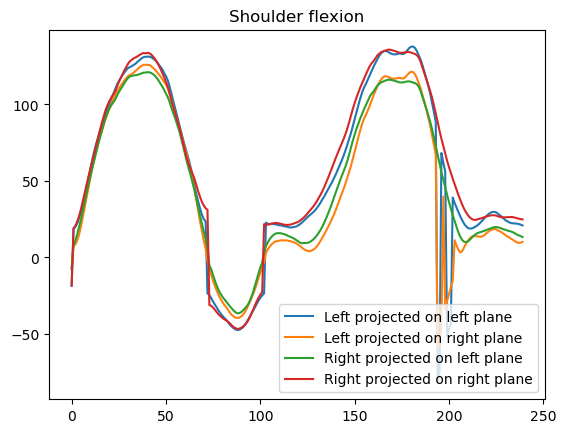

In [522]:
t1, t2 = time_id(df_test, 155, 163)
plt.title('Shoulder flexion')
plt.plot(angle_l_l[t1:t2], label = 'Left projected on left plane')
plt.plot(angle_l_r[t1:t2], label = 'Left projected on right plane')
plt.plot(angle_r_l[t1:t2], label = 'Right projected on left plane')
plt.plot(angle_r_r[t1:t2], label = 'Right projected on right plane')
plt.legend()

In [523]:
#shoulder abduc
A_l = df_test['rightshoulder'] - df_test['leftshoulder']
B_l = df_test['lefthip'] - df_test['leftshoulder']
D_l = df_test['leftelbow'] - df_test['leftshoulder']

B_l = [unit_vector(b) for b in B_l]
D_l = [unit_vector(d) for d in D_l]
N_l = [np.cross(a, b) for a, b in zip(A_l, B_l)]
N_norm_l = [np.linalg.norm(n) for n in N_l]

A_r = df_test['leftshoulder'] - df_test['rightshoulder']
B_r = df_test['righthip'] - df_test['rightshoulder']
D_r = df_test['rightelbow'] - df_test['rightshoulder']
B_r = [unit_vector(b) for b in B_r]
D_r = [unit_vector(d) for d in D_r]
N_r = [np.cross(b, a) for a, b in zip(A_r, B_r)]
N_norm_r = [np.linalg.norm(n) for n in N_r]

# d projection
D_l_proj_l = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_l, N_l, N_norm_l)]
D_l_proj_r = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_l, N_r, N_norm_r)]
D_r_proj_l = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_r, N_l, N_norm_l)]
D_r_proj_r = [d - (np.dot(d, n)/norm**2)*n for d, n, norm in zip(D_r, N_r, N_norm_r)]

angle_l_l = [np.dot(d, b) for d, b in zip(D_l_proj_l, B_l)]
angle_l_l = np.arccos(angle_l_l)*180/np.pi

angle_l_r = [np.dot(d, b) for d, b in zip(D_l_proj_r, B_r)]
angle_l_r = np.arccos(angle_l_r)*180/np.pi

angle_r_l = [np.dot(d, b) for d, b in zip(D_r_proj_l, B_l)]
angle_r_l = np.arccos(angle_r_l)*180/np.pi

angle_r_r = [np.dot(d, b) for d, b in zip(D_r_proj_r, B_r)]
angle_r_r = np.arccos(angle_r_r)*180/np.pi


""" N_norm = [np.linalg.norm(n) for n in N]
D_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D_u, N, N_norm)]
angle = [np.dot(d, b) for d, b in zip(D_proj, B_u)]
angle = np.arccos(angle)*180/np.pi """

' N_norm = [np.linalg.norm(n) for n in N]\nD_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D_u, N, N_norm)]\nangle = [np.dot(d, b) for d, b in zip(D_proj, B_u)]\nangle = np.arccos(angle)*180/np.pi '

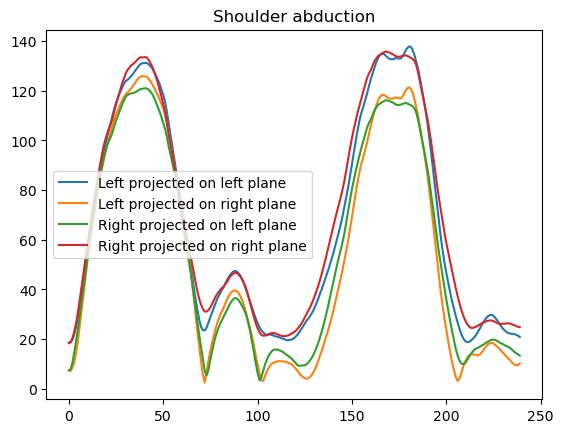

In [524]:
t1, t2 = time_id(df_test, 155, 163)
plt.title('Shoulder abduction')
plt.plot(angle_l_l[t1:t2], label = 'Left projected on left plane')
plt.plot(angle_l_r[t1:t2], label = 'Left projected on right plane')
plt.plot(angle_r_l[t1:t2], label = 'Right projected on left plane')
plt.plot(angle_r_r[t1:t2], label = 'Right projected on right plane')
plt.legend()

### Shoulder other rotation

In [553]:
#left shoulder
A = df_test['rightshoulder'] - df_test['leftshoulder']
B = df_test['lefthip'] - df_test['leftshoulder']
B = [unit_vector(b) for b in B] 
D = df_test['leftelbow'] - df_test['leftshoulder']
D = [unit_vector(d) for d in D]

N = [np.cross(a, b) for a, b in zip(A, B)]
N2 = [np.cross(a, n) for a, n in zip(A, N)]
N2_norm = [np.linalg.norm(n) for n in N2]

# d projection
D_proj = [d - unit_vector((np.dot(d, n)/norm**2)*n) for d, n, norm in zip(D, N2, N2_norm)]
angle = [np.dot(d, n) for d, n in zip(D_proj, N)]
angle = np.arccos(angle)*180/np.pi

In [554]:
events_test

{'elbow': [[149, 155], [163, 167]],
 'shoulder_flex': [[155, 159]],
 'shoulder_abd': [[159, 163]],
 'trunk_fwd_flex': [[171, 175]],
 'trunk_lat_flex': [[175, 179]],
 'trunk_rot': [[185, 188]]}

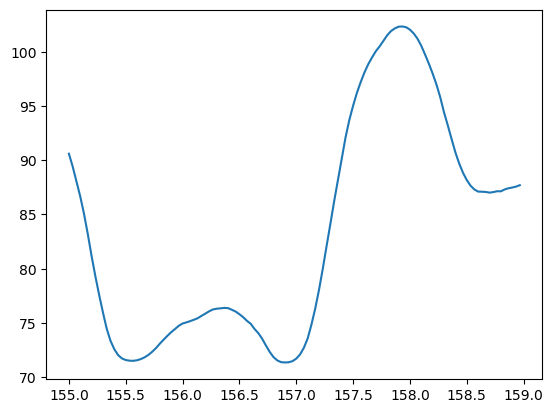

In [556]:
t1, t2 = time_id(df_test, 155, 159)
plt.plot(df_test['time'][t1:t2], angle[t1:t2])

### Goal 
Define a pre-processing pipeline and find features to assess dexterity, to see if the amputees movements are "less efficient" than the able-bodied ones during specific cooking tasks

### Features until now
- Joints instantaneous positions, velocities, accelerations
- Joint angles/angular velocities of :
    - Shoulder flexion
    - Shoulder abduction
    - Elbow flexion 
    - Trunk forward flexion 
    - Trunk lateral flexion 
    - Trunk transverse rotation 
- Range of Motion of each of these DoFs


### Later
- More features : 
    - Joints instantaneous positions, velocities, accelerations relative to body frame
    - Absolute kinematic variability
    - Centroid of segments
    - Reach distance
    - Joints coupling/correlation
    - (Movement variability/complexity)
- See any potential differences between amputees and able-bodied people depending on these features



In [304]:
df_test.columns.values

array(['time', 'nose', 'lefteye', 'righteye', 'leftear', 'rightear',
       'leftshoulder', 'rightshoulder', 'leftelbow', 'rightelbow',
       'leftwrist', 'rightwrist', 'lefthip', 'righthip', 'leftknee',
       'rightknee', 'leftfoot', 'rightfoot', 'hips', 'neck',
       'leftshoulder_flex', 'rightshoulder_flex', 'leftshoulder_abduc',
       'rightshoulder_abduc', 'leftelbow_flex', 'rightelbow_flex',
       'trunk_forward_flex', 'trunk_lateral_flex', 'trunk_rotation',
       'leftshoulder_flex_w', 'rightshoulder_flex_w',
       'leftshoulder_abduc_w', 'rightshoulder_abduc_w',
       'leftelbow_flex_w', 'rightelbow_flex_w', 'trunk_forward_flex_w',
       'trunk_lateral_flex_w', 'trunk_rotation_w', 'leftelbow_w',
       'nose_w', 'lefteye_w', 'righteye_w', 'leftear_w', 'rightear_w',
       'leftshoulder_w', 'rightshoulder_w', 'rightelbow_w', 'leftwrist_w',
       'rightwrist_w', 'lefthip_w', 'righthip_w', 'leftknee_w',
       'rightknee_w', 'leftfoot_w', 'rightfoot_w', 'nose_a', 'leftey

### Plot videos shit

In [245]:
events_test = {'elbow' : [[149, 155], [163, 167]],
               'shoulder_flex': [[155, 159]],
               'shoulder_abd': [[159, 163]],
               'trunk_fwd_flex': [[171, 175]],
               'trunk_lat_flex': [[175, 179]],
               'trunk_rot': [[185, 188]]}

In [342]:
# NOT FINISHED, WILL ASK FRANKLIN FOR THE CODE TO NOT LOSE ANY MORE TIME ON THIS

""" Plots a joint at a specific time"""
def plot_joint_video(data, t, joint_l, joint_r, title, trunk = False):
    if trunk == True:
        plt.plot(t, data[joint_l][t])
    else:
        plt.plot(t, data[joint_l][t], label = 'Left')
        plt.plot(t, data[joint_r][t], label = 'Right')
        plt.legend()
    plt.ylabel('Degree [°]')
    plt.xlabel('Time [s]')
    plt.title(title)

""" Return an img of one plot frame """
def plot_joints_video(data, t, fig):
    plt.subplot(2, 3, 1)
    plot_joint_video(data, t, 'leftelbow_flex', 'rightelbow_flex', title = 'Elbow flexion')

    plt.subplot(2, 3, 2)
    plot_joint_video(data, t, 'leftshoulder_flex', 'rightshoulder_flex', title ='Shoulder flexion')

    plt.subplot(2, 3, 3)
    plot_joint_video(data, t, 'leftshoulder_abduc', 'rightshoulder_abduc', title ='Shoulder abduction')

    plt.subplot(2, 3, 4)
    plot_joint_video(data, t, 'trunk_forward_flex', '', title = 'Trunk forward flexion', trunk=True)

    plt.subplot(2, 3, 5)
    plot_joint_video(data, t, 'trunk_lateral_flex', '', title = 'Trunk lateral flexion', trunk=True)

    plt.subplot(2, 3, 6)
    plot_joint_video(data, t, 'trunk_rotation', '', title = 'Trunk transverse rotation', trunk=True)

    fig.tight_layout()
    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.cla()
    return img

""" Create video of real time plot of all joints during a period of time"""
def video_joints(file_name, data, t1, t2, title):    
    t1, t2 = time_id(data, t1, t2)
    fig = plt.figure(figsize=(6, 6))
    x = data['time'][t1:t2]
    fig.suptitle(title)
    
    fps = 30.0
    size = (600,600)
    out = cv2.VideoWriter(f'videos/{file_name}.avi', cv2.VideoWriter_fourcc(*'MJPG'), fps, size)
    for t in range(t1, t2+1):
        img = plot_joints_video(data, x[t], fig)
        out.write(img)
    out.release()


(<unknown>:43460): GStreamer-CRITICAL **: 10:37:19.796: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@22552.383] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@22552.385] global /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/ec2-user/ci_py311/opencv-suite_1678377996177/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): videos/rightelbow_flex.avi in function 'icvExtractPattern'




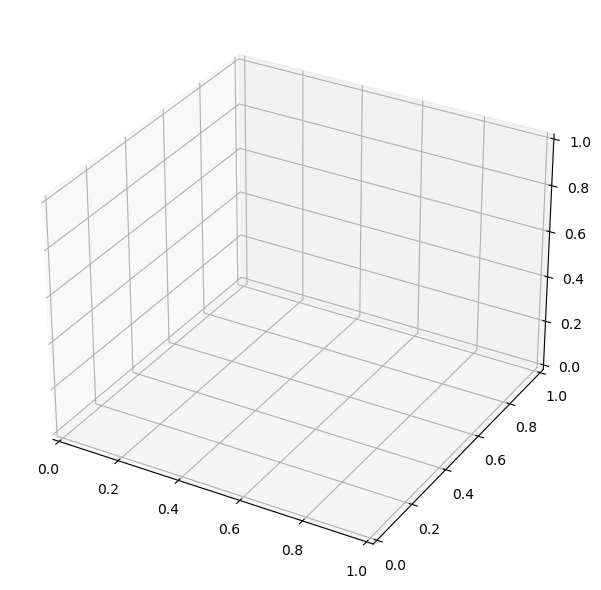

In [345]:
#plot_all_joints(df_test, events_test['elbow'][0][0], events_test['elbow'][0][1], 'Upper joint angles during right elbow flexion')
t1 = events_test['elbow'][0][0]
t2 = events_test['elbow'][0][1]
video_skeleton('rightelbow_flex', df_test, t1, t2)

#video_joints('biboup', df_test, 171, 179, 'ouais la vie')

### Shoulder flexion

In [263]:
events_test

{'elbow': [[149, 155], [163, 167]],
 'shoulder_flex': [[155, 159]],
 'shoulder_abd': [[159, 163]],
 'trunk_fwd_flex': [[171, 175]],
 'trunk_lat_flex': [[175, 179]],
 'trunk_rot': [[185, 188]]}

In [ ]:
plot_all_joints(df_test, events_test['shoulder_flex'][0][0], events_test['shoulder_flex'][0][1], 'Upper joint angles during shoulder flexion')
t1, t2 = time_id(df_test, events_test['shoulder_flex'][0][0], events_test['shoulder_flex'][0][1])
video_skeleton('shoulder_flex', df_test, t1, t2)